# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1 . Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [1]:
!pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

### Ï∂îÍ∞Ä
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 216.2/216.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=387f54a96896c74a1702bf7384be7bb380113ce55e8effbd9e20da0b9a447c41
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.7 MB/s)
Selecting previously unselected package fonts-nanum.
(Readin

In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')

### Ï∂îÍ∞Ä
#plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
### Ï∂úÏ≤ò: https://giveme-happyending.tistory.com/192 [ÏÜåÏó∞Ïùò_Í∞úÎ∞úÏùºÏßÄ:Ìã∞Ïä§ÌÜ†Î¶¨]

import seaborn as sns

# utils
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

import seaborn as sns
from tqdm import tqdm
import pickle
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb


import eli5
from eli5.sklearn import PermutationImportance

## 2 . Data Load

### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import os
# print(os.getcwd())

In [5]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '/content/drive/MyDrive/AILAB_Advance/train.csv'
test_path  = '/content/drive/MyDrive/AILAB_Advance/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

### 2.2 Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö©ÌôïÏù∏

#### 2.2.1 dt Ïùò Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö© ÌôïÏù∏

In [6]:
# dt.head(1)

In [7]:
# dt.info()

In [8]:
# dt.describe()

In [9]:
# dt.ÏãúÍµ∞Íµ¨.value_counts()

In [10]:
# dt.ÏïÑÌååÌä∏Î™Ö.value_counts()

In [11]:
# dt['k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)'].value_counts()

In [12]:
# dt['k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)'].value_counts()

In [13]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)

In [14]:
# TrainÍ≥º Test dataÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
# display(dt.head(1))
# display(dt_test.head(1))      # Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä(=Target) columnÏù¥ Ï†úÏô∏Îêú Î™®ÏäµÏûÖÎãàÎã§.

#### 2.2.2 dt_ test Ïùò Îç∞Ïù¥ÌÑ∞ ÎÇ¥Ïö© ÌôïÏù∏

In [15]:
# dt_test.info()

In [16]:
### target Ï∂îÍ∞ÄÏôÄ Í∞í ÏÖãÌåÖ
dt_test['target'] = 0

In [17]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
# dt.isnull().sum()

## 3 . Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

<font color=Tomato> **concat ÌååÏùº ÎßåÎì§Í∏∞**

In [18]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [19]:
concat['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

is_test
0    1118822
1       9272
Name: count, dtype: int64

In [20]:
# concat[['ÏãúÍµ∞Íµ¨','Î≤àÏßÄ','Î≥∏Î≤à','Î∂ÄÎ≤à']].head(20)

In [21]:
### Í≥†Ïú†Ìïú ÏàúÏÑú Ïù∏Îç±Ïä§Î•º Î¶¨ÏÖãÌïòÍ≥† Í∏∞Ï°¥ Ïù∏Îç±Ïä§Î•º ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï∂îÍ∞Ä
concat.reset_index(drop=True, inplace=True)
concat['index_num'] = concat.index

In [22]:
# ÏπºÎüº Ïù¥Î¶ÑÏùÑ ÏâΩÍ≤å Î∞îÍøîÏ£ºÍ≤†ÏäµÎãàÎã§. Îã§Î•∏ ÏπºÎüºÎèÑ ÏÇ¨Ïö©Ïóê Îî∞Îùº Î∞îÍøîÏ£ºÏÖîÎèÑ Îê©ÎãàÎã§!
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å'})

In [23]:
# concat.isnull().sum()

In [24]:
# concat.info()

ÏïÑÌååÌä∏Î™Ö, Î≤àÏßÄ, Î≥∏Î≤à, Î∂ÄÎ≤à, Í≤∞Ï∏°Ïπò Íµ¨Î∂ÑÍ∞í ÎßåÎì§Í≥† |

ÏïÑÌååÌä∏Î™Ö, Î≤àÏßÄ, Î≥∏Î≤à, Î∂ÄÎ≤à ÏÇ≠Ï†ú

In [25]:
### 'Íµ¨Î∂Ñ' 'Íµ¨Î∂Ñdate' Ïª¨Îüº ÏÉùÏÑ±
#concat['Íµ¨Î∂Ñ'] = concat['ÏãúÍµ∞Íµ¨'] + ' ' + concat['Î≤àÏßÄ'] + ' ' + concat['ÏïÑÌååÌä∏Î™Ö']  Ï†ÑÏö©Î©¥Ï†ÅÍπåÏßÄ Ìè¨Ìï®ÏãúÏºúÏÑú Íµ¨Î∂ÑÏúºÎ°ú Î∞îÍøà
concat['Íµ¨Î∂Ñ'] = concat['ÏãúÍµ∞Íµ¨'].astype(str) + ' ' + concat['Î≤àÏßÄ'].astype(str) + ' ' + concat['ÏïÑÌååÌä∏Î™Ö'].astype(str) + ' ' + concat['Ï†ÑÏö©Î©¥Ï†Å'].astype(str)
concat['Íµ¨Î∂Ñdate'] = concat['Íµ¨Î∂Ñ'] + ' ' + concat['Í≥ÑÏïΩÎÖÑÏõî'].astype(str)



### concat['Íµ¨Î∂Ñnum'] ÎßåÎì§Í∏∞
mean_target = concat.groupby('Íµ¨Î∂Ñ')['target'].mean().reset_index()
#mean_target = mean_target.sort_values(by=['Íµ¨Î∂Ñ'])

# Ïù∏Îç±Ïä§Î•º Î¶¨ÏÖãÌïòÍ≥† Í∏∞Ï°¥ Ïù∏Îç±Ïä§Î•º ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï∂îÍ∞Ä
mean_target.reset_index(drop=True, inplace=True)
mean_target['Íµ¨Î∂Ñnum'] = mean_target.index

# Î∂àÌïÑÏöîÍ∞í ÏÇ≠Ï†ú
mean_target = mean_target.drop(columns=['target'])

### ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
concat = pd.merge(concat, mean_target, on='Íµ¨Î∂Ñ', how='left')

In [26]:
concat.drop(columns=['ÏïÑÌååÌä∏Î™Ö','Î≤àÏßÄ','Î≥∏Î≤à','Î∂ÄÎ≤à'], inplace=True)

Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îß§Îß§ ÏïàÎêú Í≤ÉÏúºÎ°ú ? Îß§Îß§Îêú Í≤ÉÏúºÎ°ú? <font color=Tomato> Îß§Îß§Îêú Í≤ÉÏúºÎ°ú ÏÇ≠Ï†ú ÏïàÌï®

Ìï¥Ï†úÏÇ¨Ïú†ÏùºÏùÑ Í∞ÄÏßÑ Í∞í Í∞ØÏàò ÌôïÏù∏

In [27]:
print("Ìï¥Ï†úÏÇ¨Ïú†Ïùº Í∞ÄÏßÑ Í∞í: ",len(concat), "-" ,concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'].isnull().sum(), "=", len(concat) - concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'].isnull().sum())

Ìï¥Ï†úÏÇ¨Ïú†Ïùº Í∞ÄÏßÑ Í∞í:  1128094 - 1121899 = 6195


In [28]:
###ÎëêÍ∞ú Í∞í Ï∞æÎäî ÏΩîÎìú
#df[df[column].isin([value1, value2])]

In [29]:
###ÌïúÍ∞ú Í∞í Ï∞æÎäî ÏΩîÎìú
#concat[concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'] != None]['target']

In [30]:
###
concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'].isnull().sum(), concat['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'].isna().sum()

(1121899, 1121899)

In [31]:
###
concat.drop(columns=['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº'], inplace=True)

'Í≥ÑÏïΩÏùº' 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ' ÏÇ≠Ï†ú

In [32]:
###
concat.drop(columns=['Í≥ÑÏïΩÏùº', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'], inplace=True)

K Í∞í Ï†ïÎ¶¨

ÏùòÎØ∏ ÏûàÎã§. ÏóÜÎã§.
<font color=gray>
- ÏÇ≠Ï†ú 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)'
- ÏÇ≠Ï†ú 'k-Ï†ÑÌôîÎ≤àÌò∏',
- ÏÇ≠Ï†ú 'k-Ìå©Ïä§Î≤àÌò∏',
- ÏÇ≠Ï†ú 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob',
- ÏÇ≠Ï†ú 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)',
- ÏÇ≠Ï†ú 'k-Í¥ÄÎ¶¨Î∞©Ïãù',
- ÏÇ≠Ï†ú 'k-Î≥µÎèÑÏú†Ìòï',
</font>  
- 'k-ÎÇúÎ∞©Î∞©Ïãù',
- 'k-Ï†ÑÏ≤¥ÎèôÏàò',
- 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
- 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)',
<font color=gray>
- ÏÇ≠Ï†ú 'k-ÏãúÌñâÏÇ¨',
- ÏÇ≠Ï†ú 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
</font>  
- 'k-Ïó∞Î©¥Ï†Å',
<font color=gray>
- ÏÇ≠Ï†ú 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
- ÏÇ≠Ï†ú 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
</font>  
- 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
- 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)',
- 'k-85„é°~135„é°Ïù¥Ìïò',
- 'k-135„é°Ï¥àÍ≥º',
<font color=gray>
- ÏÇ≠Ï†ú 'k-ÌôàÌéòÏù¥ÏßÄ',
- ÏÇ≠Ï†ú 'k-Îì±Î°ùÏùºÏûê',
- ÏÇ≠Ï†ú 'k-ÏàòÏ†ïÏùºÏûê' - Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ìï¥Î≥¥Îãà Ï†ÑÌòÄ Ïó∞Í¥ÄÏóÜÏñ¥Î≥¥ÏûÑ
</font>  




In [33]:
###
concat.drop(columns=['k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)','k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï',
                     'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
                     'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
                     'k-ÌôàÌéòÏù¥ÏßÄ', 'k-Îì±Î°ùÏùºÏûê','k-ÏàòÏ†ïÏùºÏûê'], inplace=True)

Í∏∞ÌÉÄ ÎÇ¥Ïö© Ï†ïÎ¶¨

ÏùòÎØ∏ ÏûàÎã§ ÏóÜÎã§.
<font color=gray>
- ÏÇ≠Ï†ú 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏',
- ÏÇ≠Ï†ú 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
- ÏÇ≠Ï†ú 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï',
- ÏÇ≠Ï†ú 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',       
</font>
- 'Í±¥Ï∂ïÎ©¥Ï†Å',
- 'Ï£ºÏ∞®ÎåÄÏàò',
<font color=gray>
- 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
- 'Îã®ÏßÄÏäπÏù∏Ïùº',
- 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä',
- 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú',
</font>
- 'Ï¢åÌëúX',
- 'Ï¢åÌëúY',
<font color=gray>
- 'Îã®ÏßÄÏã†Ï≤≠Ïùº',

In [34]:
concat.drop(columns=['Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú','Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº'], inplace=True)

In [35]:
len(concat.columns), concat.columns

(25,
 Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò',
        'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
        'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
        'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate',
        'Íµ¨Î∂Ñnum'],
       dtype='object'))

In [36]:
concat['k-85„é°~135„é°Ïù¥Ìïò'].value_counts()

k-85„é°~135„é°Ïù¥Ìïò
0.0      100377
90.0       3254
486.0      3068
900.0      2605
456.0      2573
          ...  
9.0          38
487.0        22
220.0        15
2.0          12
494.0         2
Name: count, Length: 244, dtype: int64

In [37]:
concat['k-135„é°Ï¥àÍ≥º'].value_counts()

k-135„é°Ï¥àÍ≥º
70.0    329
Name: count, dtype: int64

In [38]:
concat.columns

Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò',
       'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate',
       'Íµ¨Î∂Ñnum'],
      dtype='object')

In [39]:
a = concat.isnull().sum()

In [40]:
b = concat.count()

In [41]:
b

ÏãúÍµ∞Íµ¨                       1128094
Ï†ÑÏö©Î©¥Ï†Å                      1128094
Í≥ÑÏïΩÎÖÑÏõî                      1128094
Ï∏µ                         1128094
Í±¥Ï∂ïÎÖÑÎèÑ                      1128094
ÎèÑÎ°úÎ™Ö                       1128094
k-ÎÇúÎ∞©Î∞©Ïãù                     251969
k-Ï†ÑÏ≤¥ÎèôÏàò                     250887
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                    251969
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                 250457
k-Ïó∞Î©¥Ï†Å                      251969
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)         251924
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)     251924
k-85„é°~135„é°Ïù¥Ìïò               251924
k-135„é°Ï¥àÍ≥º                      329
Í±¥Ï∂ïÎ©¥Ï†Å                       251815
Ï£ºÏ∞®ÎåÄÏàò                       251817
Ï¢åÌëúX                        251862
Ï¢åÌëúY                        251862
target                    1128094
is_test                   1128094
index_num                 1128094
Íµ¨Î∂Ñ                        1128094
Íµ¨Î∂Ñdate                    1128094
Íµ¨Î∂Ñ

In [42]:
b/1128094

ÏãúÍµ∞Íµ¨                       1.000000
Ï†ÑÏö©Î©¥Ï†Å                      1.000000
Í≥ÑÏïΩÎÖÑÏõî                      1.000000
Ï∏µ                         1.000000
Í±¥Ï∂ïÎÖÑÎèÑ                      1.000000
ÎèÑÎ°úÎ™Ö                       1.000000
k-ÎÇúÎ∞©Î∞©Ïãù                    0.223358
k-Ï†ÑÏ≤¥ÎèôÏàò                    0.222399
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   0.223358
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                0.222018
k-Ïó∞Î©¥Ï†Å                     0.223358
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)        0.223318
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)    0.223318
k-85„é°~135„é°Ïù¥Ìïò              0.223318
k-135„é°Ï¥àÍ≥º                  0.000292
Í±¥Ï∂ïÎ©¥Ï†Å                      0.223222
Ï£ºÏ∞®ÎåÄÏàò                      0.223223
Ï¢åÌëúX                       0.223263
Ï¢åÌëúY                       0.223263
target                    1.000000
is_test                   1.000000
index_num                 1.000000
Íµ¨Î∂Ñ                        1.000000
Íµ¨Î∂Ñdate           

In [43]:
a = concat[concat['is_test']==1]

In [44]:
a.count() / 9272  # ÎåÄÎûµ 30ÌçºÏÑºÌä∏ k Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏùå

ÏãúÍµ∞Íµ¨                       1.000000
Ï†ÑÏö©Î©¥Ï†Å                      1.000000
Í≥ÑÏïΩÎÖÑÏõî                      1.000000
Ï∏µ                         1.000000
Í±¥Ï∂ïÎÖÑÎèÑ                      1.000000
ÎèÑÎ°úÎ™Ö                       1.000000
k-ÎÇúÎ∞©Î∞©Ïãù                    0.292278
k-Ï†ÑÏ≤¥ÎèôÏàò                    0.290660
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   0.292278
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                0.290444
k-Ïó∞Î©¥Ï†Å                     0.292278
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)        0.292278
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)    0.292278
k-85„é°~135„é°Ïù¥Ìïò              0.292278
k-135„é°Ï¥àÍ≥º                  0.000216
Í±¥Ï∂ïÎ©¥Ï†Å                      0.291954
Ï£ºÏ∞®ÎåÄÏàò                      0.292170
Ï¢åÌëúX                       0.292278
Ï¢åÌëúY                       0.292278
target                    1.000000
is_test                   1.000000
index_num                 1.000000
Íµ¨Î∂Ñ                        1.000000
Íµ¨Î∂Ñdate           

In [45]:
concat['k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)'].value_counts()

k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)
ÏÇºÏÑ±Î¨ºÏÇ∞         14259
ÎåÄÏö∞Í±¥ÏÑ§         11549
ÌòÑÎåÄÍ±¥ÏÑ§         10575
ÎåÄÌïúÏ£ºÌÉùÍ≥µÏÇ¨        7665
GSÍ±¥ÏÑ§          7015
             ...  
ÎëêÏÇ∞               5
Ïã†ÏòÅÍ±¥ÏÑ§             3
ÏûêÏù¥ÏóêÏä§Ïï§Îîî(Ï£º)        2
ÌòúÎ¶ºÍ±¥ÏÑ§             1
ÏÇºÏùµÍ±¥ÏÑ§(Ï£º)          1
Name: count, Length: 344, dtype: int64

##### Ï∞∏Í≥†

In [46]:
# ÌñâÏùò ÎÑêÍ∞íÏùÑ Ï∞æÎäî ÏΩîÎìú
concat.isna().sum(axis=1).count()

1128094

In [47]:
#### Ï∞∏Í≥† ÏòàÏãú

# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
np.random.seed(0)  # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï¥ ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
data = np.random.choice([1, 2, 0], size=(10, 10))
df = pd.DataFrame(data, columns=[f'col{i}' for i in range(10)])

print("Original DataFrame:")
print(df)

# ÌñâÏóê Í∞íÏù¥ 1, 2Îßå ÏûàÎäî Í≤ÉÏùÑ Ï∞æÏïÑÏÑú ÏÇ≠Ï†úÌïòÎäî Ìï®Ïàò
def remove_rows_with_only_1_and_2(df):
    mask = (df == 1) | (df == 2)  # Í∞Å ÏöîÏÜåÍ∞Ä 1 ÎòêÎäî 2Ïù∏ÏßÄ ÌôïÏù∏ÌïòÎäî ÎßàÏä§ÌÅ¨
    rows_to_delete = mask.all(axis=1)  # Î™®Îì† ÏöîÏÜåÍ∞Ä 1 ÎòêÎäî 2Ïù∏ ÌñâÏùÑ Ï∞æÏùå
    df = df[~rows_to_delete]  # Ìï¥Îãπ ÌñâÏùÑ ÏÇ≠Ï†ú
    return df

# Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ìñâ ÏÇ≠Ï†ú
df_cleaned = remove_rows_with_only_1_and_2(df)

print("\nDataFrame after removing rows with only 1 and 2:")
print(df_cleaned)



Original DataFrame:
   col0  col1  col2  col3  col4  col5  col6  col7  col8  col9
0     1     2     1     2     2     0     1     0     1     1
1     1     0     2     0     0     1     2     2     2     2
2     1     2     1     1     2     0     1     0     1     2
3     2     0     1     2     2     2     1     0     1     0
4     0     1     0     1     1     1     2     2     0     1
5     1     2     1     2     0     0     1     2     2     2
6     2     0     0     0     1     0     2     1     2     0
7     1     1     0     1     1     1     1     1     1     0
8     1     0     2     2     2     1     2     2     2     1
9     2     0     1     2     0     1     0     1     2     0

DataFrame after removing rows with only 1 and 2:
   col0  col1  col2  col3  col4  col5  col6  col7  col8  col9
0     1     2     1     2     2     0     1     0     1     1
1     1     0     2     0     0     1     2     2     2     2
2     1     2     1     1     2     0     1     0     1     2


In [48]:
#### Ï∞∏Í≥† ÏòàÏãú
# ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
np.random.seed(0)  # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï¥ ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
data = np.random.choice([1, 2, 0, np.nan], size=(10, 10))
df = pd.DataFrame(data, columns=[f'col{i}' for i in range(10)])

print("Original DataFrame:")
print(df)

# ÌñâÏóê Í∞íÏù¥ ÌïòÎÇòÎùºÎèÑ ÏûàÎäî Î™®Îì† ÌñâÏùÑ Ï∞æÏïÑÏÑú ÏÉàÎ°úÏö¥ Î≥ÄÏàòÏóê Ï†ÄÏû•ÌïòÎäî Ìï®Ïàò
def get_rows_with_any_value(df):
    rows_with_values = df.dropna(how='all')  # Î™®Îì† Í∞íÏù¥ NaNÏù∏ ÌñâÏùÑ Ï†úÍ±∞
    return rows_with_values

# Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî ÌñâÏùÑ Î≥ÄÏàòÏóê Ï†ÄÏû•
filtered_rows = get_rows_with_any_value(df)

# Í≤∞Í≥º Ï∂úÎ†•
print("\nRows with at least one non-NaN value:")
print(filtered_rows)


Original DataFrame:
   col0  col1  col2  col3  col4  col5  col6  col7  col8  col9
0   1.0   NaN   2.0   1.0   NaN   NaN   NaN   NaN   2.0   NaN
1   2.0   0.0   1.0   NaN   0.0   1.0   1.0   1.0   0.0   2.0
2   0.0   NaN   NaN   0.0   1.0   2.0   2.0   2.0   2.0   1.0
3   2.0   1.0   NaN   1.0   NaN   2.0   0.0   NaN   NaN   1.0
4   0.0   NaN   1.0   2.0   NaN   2.0   NaN   NaN   0.0   NaN
5   1.0   2.0   2.0   2.0   NaN   1.0   NaN   0.0   1.0   NaN
6   NaN   0.0   NaN   0.0   NaN   1.0   0.0   1.0   1.0   1.0
7   2.0   2.0   0.0   1.0   1.0   2.0   NaN   1.0   2.0   0.0
8   0.0   NaN   1.0   2.0   2.0   NaN   2.0   2.0   NaN   0.0
9   NaN   NaN   0.0   0.0   NaN   1.0   0.0   NaN   2.0   1.0

Rows with at least one non-NaN value:
   col0  col1  col2  col3  col4  col5  col6  col7  col8  col9
0   1.0   NaN   2.0   1.0   NaN   NaN   NaN   NaN   2.0   NaN
1   2.0   0.0   1.0   NaN   0.0   1.0   1.0   1.0   0.0   2.0
2   0.0   NaN   NaN   0.0   1.0   2.0   2.0   2.0   2.0   1.0
3   2.0   1

##### Í≥ÑÏÜç

In [49]:
tmp = concat.copy()
tmp = tmp[['k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò',
       'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å',
       'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY']].dropna(how='all')  # Î™®Îì† Í∞íÏù¥ NaNÏù∏ ÌñâÏùÑ Ï†úÍ±∞

In [50]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251969 entries, 0 to 1128093
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   k-ÎÇúÎ∞©Î∞©Ïãù                  251969 non-null  object 
 1   k-Ï†ÑÏ≤¥ÎèôÏàò                  250887 non-null  float64
 2   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 251969 non-null  float64
 3   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              250457 non-null  object 
 4   k-Ïó∞Î©¥Ï†Å                   251969 non-null  float64
 5   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)      251924 non-null  float64
 6   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  251924 non-null  float64
 7   k-85„é°~135„é°Ïù¥Ìïò            251924 non-null  float64
 8   k-135„é°Ï¥àÍ≥º                329 non-null     float64
 9   Í±¥Ï∂ïÎ©¥Ï†Å                    251815 non-null  float64
 10  Ï£ºÏ∞®ÎåÄÏàò                    251817 non-null  float64
 11  Ï¢åÌëúX                     251862 non-null  float64
 12  Ï¢åÌ

In [51]:
### Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Ïö© Ï†ÄÏû•
# tmp.to_csv('/content/drive/MyDrive/AILAB_Advance/k-value.csv')

In [52]:
concat.columns

Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò',
       'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò',
       'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate',
       'Íµ¨Î∂Ñnum'],
      dtype='object')

k-Í∞í Î™®Îëê Î≤ÑÎ¶¨Í∏∞

In [53]:
concatk = concat.copy()
concat.drop(columns=['k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò','k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
                              'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-135„é°Ï¥àÍ≥º', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò','Ï¢åÌëúX', 'Ï¢åÌëúY'], inplace=True)

In [54]:
concat.isnull().sum()

ÏãúÍµ∞Íµ¨          0
Ï†ÑÏö©Î©¥Ï†Å         0
Í≥ÑÏïΩÎÖÑÏõî         0
Ï∏µ            0
Í±¥Ï∂ïÎÖÑÎèÑ         0
ÎèÑÎ°úÎ™Ö          0
target       0
is_test      0
index_num    0
Íµ¨Î∂Ñ           0
Íµ¨Î∂Ñdate       0
Íµ¨Î∂Ñnum        0
dtype: int64

### 3.1. Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ
- Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï† Îïå ÎßéÏù¥ Ïì∞Îäî Î∞©Î≤ïÏùÄ ÏÇ≠Ï†ú(Deletion)Í≥º ÎåÄÏ≤¥(Imputation) ÏûÖÎãàÎã§.
- Î≥∏ BaselineÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°ÏπòÎäî ÎåÄÏ≤¥ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.
  - Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî 'NULL' Ïù¥ÎùºÎäî ÏûÑÏùòÏùò Î≤îÏ£ºÎ°ú ÎåÄÏ≤¥Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)Ïù¥ÎûÄ Îëê Ï†êÏùò Í∞íÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå **Í∑∏ ÏÇ¨Ïù¥Ïùò Í∞í**ÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÅÏÑ† Í±∞Î¶¨Ïóê Îî∞Îùº ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - ÏïÑÎûò ÎëêÍ∞úÏùò Î∂âÏùÄ Ï†ê ÏÇ¨Ïù¥Ïóê ($x$, $y$) Í∞íÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥, Ìï¥Îãπ Ï†êÏù¥ Îëê Î∂âÏùÄ Ï†êÏùÑ Ïù¥ÏùÄ ÏÑ†ÌòïÏ†ÅÏù∏ ÏÑ†Î∂ÑÏóê ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥†, Îã®Ïàú ÎπÑÎ°ÄÏãùÏúºÎ°ú ($x$, $y$)Î•º Ï∂îÏ†ïÌï¥ Î≥¥Í∞ÑÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - [Ï∞∏Í≥†ÏûêÎ£å](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%EB%B3%B4%EA%B0%84%EB%B2%95#:~:text=%EC%84%A0%ED%98%95%20%EB%B3%B4%EA%B0%84%EB%B2%95(%E7%B7%9A%E5%9E%8B%E8%A3%9C%E9%96%93%E6%B3%95,%EC%9C%BC%EB%A1%9C%20%EA%B3%84%EC%82%B0%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)


> 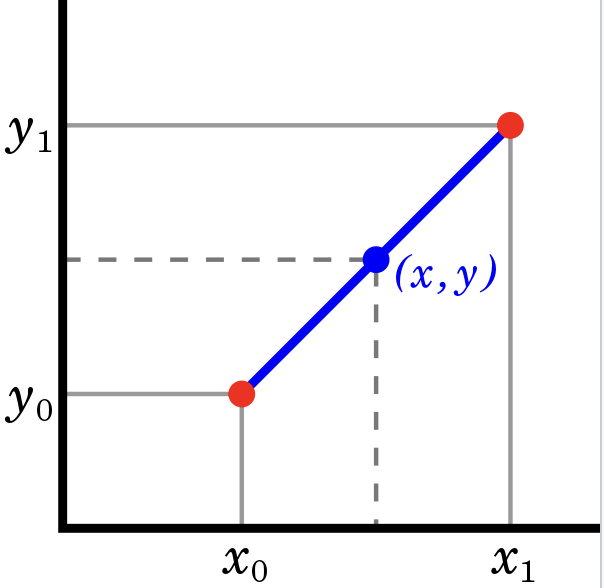

In [55]:
### Î™®Îì† ÏπºÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º Ïπ¥Ïö¥Ìä∏Î°ú Î≥¥Í∏∞
for i in range(len(concat.columns)):
    print(concat.columns[i], concat[concat.columns[i]].nunique())


ÏãúÍµ∞Íµ¨ 339
Ï†ÑÏö©Î©¥Ï†Å 14670
Í≥ÑÏïΩÎÖÑÏõî 201
Ï∏µ 73
Í±¥Ï∂ïÎÖÑÎèÑ 60
ÎèÑÎ°úÎ™Ö 9245
target 14531
is_test 2
index_num 1128094
Íµ¨Î∂Ñ 36371
Íµ¨Î∂Ñdate 661122
Íµ¨Î∂Ñnum 36371


### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

## 4 . Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [56]:
'''
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
fig = plt.figure(figsize=(13, 4))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
plt.show()
'''

"\n# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.\nfig = plt.figure(figsize=(13, 4))\nmissing = concat.isnull().sum() / concat.shape[0]\nmissing = missing[missing > 0]\nmissing.sort_values(inplace=True)\nmissing.plot.bar(color='orange')\nplt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')\nplt.show()\n"

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [57]:
'''
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)
'''

'\n# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.\ncontinuous_columns = []\ncategorical_columns = []\n\nfor column in concat_select.columns:\n    if pd.api.types.is_numeric_dtype(concat_select[column]):\n        continuous_columns.append(column)\n    else:\n        categorical_columns.append(column)\n\nprint("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)\nprint("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)\n'

- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [58]:
'''
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)
'''

"\n# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ\nconcat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')\n\n# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)\nconcat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)\n"

In [59]:
# concat_select.isnull().sum()         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation(Î≥¥Í∞ÑÎ≤ï) Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

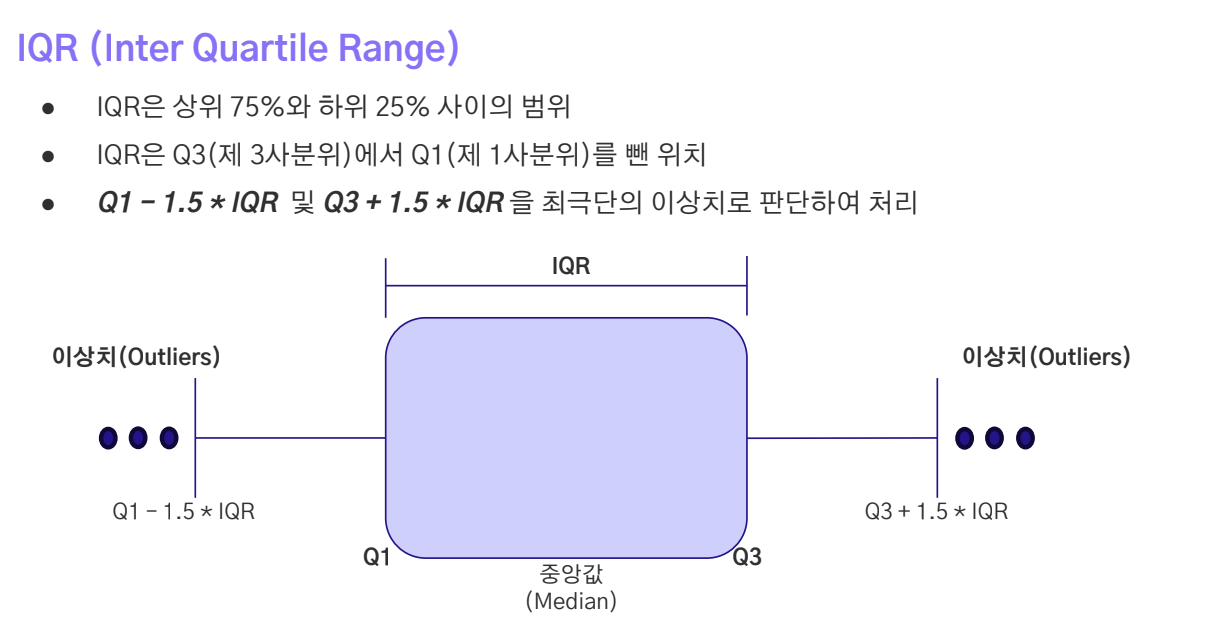

In [60]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat.shape)

(1128094, 12)


In [61]:
concat.describe()

Ï†ÑÏö©Î©¥Ï†Å          Í≥ÑÏïΩÎÖÑÏõî             Ï∏µ          Í±¥Ï∂ïÎÖÑÎèÑ        target  \
count  1.128094e+06  1.128094e+06  1.128094e+06  1.128094e+06  1.128094e+06   
mean   7.716028e+01  2.014829e+05  8.881412e+00  1.998791e+03  5.751489e+04   
std    2.936448e+01  4.237691e+02  5.989302e+00  9.358540e+00  4.653036e+04   
min    1.002000e+01  2.007010e+05 -4.000000e+00  1.961000e+03  0.000000e+00   
25%    5.965000e+01  2.011110e+05  4.000000e+00  1.992000e+03  3.000000e+04   
50%    8.187000e+01  2.015080e+05  8.000000e+00  2.000000e+03  4.450000e+04   
75%    8.496000e+01  2.018050e+05  1.200000e+01  2.005000e+03  6.950000e+04   
max    4.243200e+02  2.023090e+05  6.900000e+01  2.023000e+03  1.450000e+06   

            is_test     index_num         Íµ¨Î∂Ñnum  
count  1.128094e+06  1.128094e+06  1.128094e+06  
mean   8.219173e-03  5.640465e+05  1.754935e+04  
std    9.028635e-02  3.256528e+05  9.724563e+03  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  2.820232e+05  1.049700e+04  
50%    0.000000e+00  5.640465e+05  1.607400e+04  
75%    0.000000e+00  8.460698e+05  2.550800e+04  
max    1.000000e+00  1.128093e+06  3.637000e+04

In [62]:
concat[concat['Ï†ÑÏö©Î©¥Ï†Å'] > 135].count()

ÏãúÍµ∞Íµ¨          44127
Ï†ÑÏö©Î©¥Ï†Å         44127
Í≥ÑÏïΩÎÖÑÏõî         44127
Ï∏µ            44127
Í±¥Ï∂ïÎÖÑÎèÑ         44127
ÎèÑÎ°úÎ™Ö          44127
target       44127
is_test      44127
index_num    44127
Íµ¨Î∂Ñ           44127
Íµ¨Î∂Ñdate       44127
Íµ¨Î∂Ñnum        44127
dtype: int64

In [63]:
a = concat.Ï†ÑÏö©Î©¥Ï†Å.value_counts()

In [64]:
a = pd.DataFrame(a).reset_index()

In [65]:
a.describe()

Ï†ÑÏö©Î©¥Ï†Å         count
count  14670.000000  14670.000000
mean      94.880815     76.898023
std       53.532142    546.077378
min       10.020000      1.000000
25%       57.504975      3.000000
50%       84.619000     10.000000
75%      124.397500     33.000000
max      424.320000  20593.000000

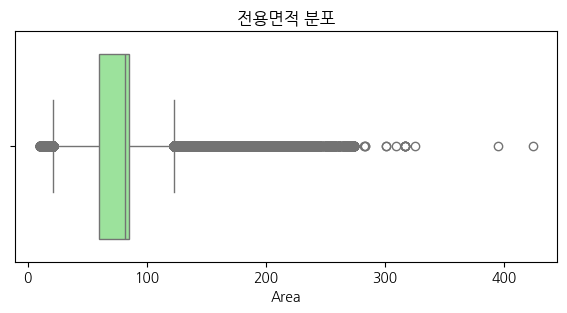

In [66]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat, x = 'Ï†ÑÏö©Î©¥Ï†Å', color='lightgreen')
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

In [67]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
    return result

In [68]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat = remove_outliers_iqr(concat, 'Ï†ÑÏö©Î©¥Ï†Å')

In [69]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
print(concat.shape)

(1038846, 12)


In [70]:
concat['is_test'].value_counts()     # ÎòêÌïú, train dataÎßå Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.

is_test
0    1029574
1       9272
Name: count, dtype: int64

In [71]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat['Íµ¨'] = concat['Íµ¨Î∂Ñ'].map(lambda x : x.split()[1])
concat['Îèô'] = concat['Íµ¨Î∂Ñ'].map(lambda x : x.split()[2])
#del concat['ÏãúÍµ∞Íµ¨']

concat['Í≥ÑÏïΩÎÖÑ'] = concat['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat['Í≥ÑÏïΩÏõî'] = concat['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
#del concat['Í≥ÑÏïΩÎÖÑÏõî']

In [72]:
len(concat.columns), concat.columns

(16,
 Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'target', 'is_test',
        'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî'],
       dtype='object'))

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [73]:
all = list(concat['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [74]:
# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [75]:
len(concat.columns), concat.columns

(17,
 Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'target', 'is_test',
        'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä'],
       dtype='object'))

In [76]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038846 entries, 0 to 1128093
Data columns (total 17 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ÏãúÍµ∞Íµ¨        1038846 non-null  object 
 1   Ï†ÑÏö©Î©¥Ï†Å       1038846 non-null  float64
 2   Í≥ÑÏïΩÎÖÑÏõî       1038846 non-null  int64  
 3   Ï∏µ          1038846 non-null  int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ       1038846 non-null  int64  
 5   ÎèÑÎ°úÎ™Ö        1038846 non-null  object 
 6   target     1038846 non-null  int64  
 7   is_test    1038846 non-null  int64  
 8   index_num  1038846 non-null  int64  
 9   Íµ¨Î∂Ñ         1038846 non-null  object 
 10  Íµ¨Î∂Ñdate     1038846 non-null  object 
 11  Íµ¨Î∂Ñnum      1038846 non-null  int64  
 12  Íµ¨          1038846 non-null  object 
 13  Îèô          1038846 non-null  object 
 14  Í≥ÑÏïΩÎÖÑ        1038846 non-null  object 
 15  Í≥ÑÏïΩÏõî        1038846 non-null  object 
 16  Í∞ïÎÇ®Ïó¨Î∂Ä       1038846 non-null  int64  
dtypes: float64(1), 

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [77]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.038846e+06
mean     1.998583e+03
std      9.132471e+00
min      1.961000e+03
10%      1.987000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.009000e+03
max      2.023000e+03
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [78]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
concat['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2009 else 0)

In [79]:
concat.head(1)       # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö  target  is_test  index_num  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  79.97  201712  3  1987  Ïñ∏Ï£ºÎ°ú 3  124000        0          0   

                                 Íµ¨Î∂Ñ                                   Íµ¨Î∂Ñdate  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 658-1 Í∞úÌè¨6Ï∞®Ïö∞ÏÑ± 79.97  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 658-1 Í∞úÌè¨6Ï∞®Ïö∞ÏÑ± 79.97 201712   

   Íµ¨Î∂Ñnum    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  
0    190  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô  2017  12     1     0

- ÏúÑ Îëê ÏÇ¨Ìï≠ Ïô∏ÏóêÎèÑ Ïô∏Î∂Ä Í≥µÍ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÍ±∞ÎÇò, EDAÎ•º ÌÜµÌï¥ Îçî ÎßéÏùÄ Î≥ÄÏàòÎ•º Ï†úÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§.

### ÏûëÏÑ±Ìïú Í≤É.

#### ÏïÑÌååÌä∏Î≥Ñ Íµ¨Î∂Ñ ÎßåÎì§Í∏∞

#### ÏïÑÌååÌä∏Î≥ÑÏóê ÌèâÏàòÎ•º 'Íµ¨Î∂Ñ' Ïª¨Îüº Ï∂îÍ∞ÄÌïòÍ∏∞

##### ÏïÑÌååÌä∏ Í±∞ÎûòÎüâ ÌôïÏù∏

#### <font color=Tomato> Ìï¥Î≥¥Î†§Îäî Í≤É 1
- ÏïÑÌååÌä∏Î≥Ñ ÏπòÏàòÎ≥ÑÎ°ú Ïó∞ Ïõî Îã®ÏúÑÎ°ú ÌèâÍ∑†Í∞íÏùÑ Í∞ÄÏßÑ Í∑∏ÎûòÌîÑ ÎßåÎì§Í∏∞
- ÏïÑÌååÌä∏Î≥Ñ ÏõîÎ≥Ñ ÏãúÍ≥ÑÏó¥ Í≤∞Ï∏°Ïπò Ï±ÑÏõåÎÑ£Í∏∞
- ÏãúÍ≥ÑÏó¥ Í¥ÄÎ†® Ïù¥ÎèôÌèâÍ∑†ÏÑ†Í≥º Í∞ÄÏ§ëÏù¥ÎèôÌèâÍ∑†ÏÑ†, ÎàÑÏ†Å Î†àÍ∑∏ÎßåÎì§Í∏∞
- ÌÉÄÏûÑ Ïä§ÌîåÎ¶øÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï™ºÍ∞úÎ°ú Î™®Îç∏ ÌïôÏäµÏãúÌÇ§Í∏∞
- ÏÉòÌîåÎßÅ Í≤∞Í≥º ÌôïÏù∏ÌïòÍ∏∞
</font>

#### <font color=Tomato> Ìï¥Î≥¥Î†§Îäî Í≤É 2
- <font color=Tomato>ÏïÑÌååÌä∏Î≥Ñ ÏπòÏàòÎ≥ÑÎ°ú Ïó∞ Ïõî Îã®ÏúÑÎ•º Í∑∏ÎûòÌîÑÎ°ú Ï†ê Ï∞çÏñ¥ÏÑú Î∂ÑÌè¨ Î≥¥Í∏∞
- Ïù¥ ÎÇ¥Ïö©Ïóê ÎåÄÌï¥ÏÑú ÏãúÍ≥ÑÏó¥Î°ú ÎêúÍ±∞ Í∑∏ÎÉ• Î∞îÎ°ú ÏòàÏ∏°ÏãúÏºúÎ≥¥Í∏∞.

<font color=Tomato> ÏúÑ ÎëêÍ∞ÄÏßÄ ÎÇ¥Ïö©Ïóê ÎåÄÌï¥ÏÑú Í≤∞Í≥ºÏπòÏóê ÎåÄÌïú ÌèâÍ∞ÄÌï¥Î≥¥Í∏∞



### ÏÉàÎ°úÏö¥ Î≥ÄÏàò ÎßåÎì§Í∏∞

[ ] Ïù¥ÎèôÌèâÍ∑†, Í∞ÄÏ§ëÏù¥ÎèôÌèâÍ∑†

[ ] ÏÑúÏö∏ ÌèâÍ∑†, Íµ¨ ÌèâÍ∑†, Îèô ÌèâÍ∑† Ï∂îÍ∞Ä






In [80]:
len(concat)

1038846

In [81]:
### ÏïÑÌååÌä∏Î≥Ñ Ï†ÑÏö©Î©¥Ï†ÅÎ≥Ñ Í±∞ÎûòÎüâ

# 2500
A = [0]
i = 0
while i < 2200:
    i += 100
    A.append(i)

tmp = concat['Íµ¨Î∂Ñ'].value_counts().reset_index()
for i in A :
    tmp1 = tmp[tmp['count'] > i]
    #print(tmp1)
    print('Í≥ÑÏïΩÍ±¥Ïàò ', i, 'Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ :', tmp1['count'].sum(), "Í±¥")


    ### Í±∞Îûò Í±¥ÏàòÎ≥Ñ ÌèâÎãπ ÌèâÍ∑† Í±∞ÎûòÍ∞ÄÍ≤©ÏùÄ?

Í≥ÑÏïΩÍ±¥Ïàò  0 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 1038846 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  100 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 650791 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  200 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 437565 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  300 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 301903 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  400 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 221179 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  500 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 159797 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  600 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 114812 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  700 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 77299 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  800 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 54011 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  900 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 43156 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1000 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 36713 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1100 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 27442 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1200 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 22885 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1300 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 16674 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1400 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 13929 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò  1500 Í±¥Ïàò Ïù¥ÏÉÅÏùò Ï†ÑÏ≤¥ Ìï©ÏùÄ : 12503 Í±¥
Í≥ÑÏïΩÍ±¥Ïàò

In [654]:
A = 50
B = 400

tmp = concat['Íµ¨Î∂Ñ'].value_counts().reset_index()
print(tmp)
print("-----------------------------------------------------------", A, "--------------------------")
tmp_50 = tmp[tmp['count'] > 200]
print(tmp_50)
print("-----------------------------------------------------------", B, "--------------------------")
tmp_400 = tmp[tmp['count'] > B]
print(tmp_400)

                                       Íµ¨Î∂Ñ  count
0             ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94   2168
1             ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ Ï§ëÍ≥ÑÎèô 369 Ï£ºÍ≥µ2 44.52   1949
2              ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Ïû†Ïã§Îèô 22 Î¶¨ÏÑºÏ∏† 84.99   1755
3            ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ Ï∞ΩÎèô 38 Ï£ºÍ≥µ17Îã®ÏßÄ 36.16   1722
4      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎ∂ÅÍµ¨ ÎØ∏ÏïÑÎèô 1353 ÏóêÏä§ÏºÄÏù¥Î∂ÅÌïúÏÇ∞ÏãúÌã∞ 59.98   1719
...                                   ...    ...
30907      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨ ÏñëÌèâÎèô4Í∞Ä 196 ÏàòÏÑ±ÏòàÏà† 82.5      1
30908     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨ ÏñëÌèâÎèô4Í∞Ä 160-2 ÏïΩÏÇ∞ 34.58      1
30909     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ Î∞©ÌïôÎèô 690-3 Î∂ÄÏòÅÌå∞Î¶¨Ïä§ 79.05      1
30910  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Í∞ÄÎùΩÎèô 77-7 ÏÜ°ÌååNsuite 112.57      1
30911        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ Ìï©Ï†ïÎèô 390-5 ÎåÄÏö¥ 58.16      1

[30912 rows x 2 columns]
----------------------------------------------------------- 50 -----------------------

### 1ÎÖÑÏ†ÑÍπåÏßÄ Í∞ÄÍ≤© Îèô ÌèâÍ∑† ÌèâÎã® Îã®Í∞ÄÎ°ú Ïú†Ï∂îÌï¥ÏÑú ÏßëÏñ¥ÎÑ£Îäî ÏΩîÎìú ÎßåÎì§Í∏∞

In [83]:
len(concat.columns),concat.columns

(18,
 Index(['ÏãúÍµ∞Íµ¨', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'target', 'is_test',
        'index_num', 'Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'Í∞ïÎÇ®Ïó¨Î∂Ä',
        'Ïã†Ï∂ïÏó¨Î∂Ä'],
       dtype='object'))

In [84]:
base = concat.copy()

In [85]:
# base.drop(columns=['index_num', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum'], inplace=True)

In [86]:
Î∏åÎ†àÏù¥ÌÅ¨

NameError: name 'Î∏åÎ†àÏù¥ÌÅ¨' is not defined

In [ ]:
# base_mean = pd.read_csv('/content/drive/MyDrive/AILAB_Advance/base_mean.csv')
# base = pd.read_csv('/content/drive/MyDrive/AILAB_Advance/base.csv')


In [ ]:
# base.info()
# base2 =
base.iloc[0][0]

In [ ]:
base.isnull().sum()

In [ ]:
tmp = base[['Íµ¨Î∂Ñ', 'Íµ¨Î∂Ñdate', 'Í≥ÑÏïΩÎÖÑÏõî', 'mean']]
tmp[tmp['Íµ¨Î∂Ñ'] == 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 1164-12 ÏÉàÎ°¨ 73.5']


In [ ]:
### ÌÖåÏä§Ìä∏

da = tmp[tmp['Íµ¨Î∂Ñ'] == 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 1164-12 ÏÉàÎ°¨ 73.5']
df = pd.DataFrame(da)

# 202007Î∂ÄÌÑ∞ 202207ÍπåÏßÄÏùò Í≥ÑÏïΩÎÖÑÏõî ÌïÑÌÑ∞ÎßÅ
filtered_df = df[(df['Í≥ÑÏïΩÎÖÑÏõî'] >= 202007) & (df['Í≥ÑÏïΩÎÖÑÏõî'] <= 202207)]

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±
pivot_table = filtered_df.pivot_table(index='Íµ¨Î∂Ñ', columns='Í≥ÑÏïΩÎÖÑÏõî', values='mean')

# Í≤∞Í≥º Ï∂úÎ†•
print("Pivoted Table:")
print(pivot_table)

In [ ]:
tmp[tmp['mean'] == 0]


In [ ]:
# ÌèâÍ∑† 0Í∞íÏù¥ ÏûàÎäî ÏïÑÌååÌä∏ ÎÇ¥Ïö© Î≥¥Í∏∞
tmp[tmp['Íµ¨Î∂Ñ'] == 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 12 ÏÇºÏùµÎåÄÏ≤≠ 39.53']

In [ ]:
# ÌèâÍ∑† 0Í∞íÏù¥ ÏûàÎäî ÏïÑÌååÌä∏ ÎÇ¥Ïö© Î≥¥Í∏∞
base[base['Íµ¨Î∂Ñ'] == 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô 12 ÏÇºÏùµÎåÄÏ≤≠ 39.53']

In [ ]:
pivoted = tmp.pivot(index='Íµ¨Î∂Ñ', columns='Í≥ÑÏïΩÎÖÑÏõî', values='mean')

In [ ]:
pivoted

In [ ]:
# train_pivoted = concat.pivot(index='Íµ¨Î∂Ñ', columns='Í≥ÑÏïΩÎÖÑÏõî', values='target')

[    ] test Í≥ÑÏïΩ Î∂ÑÌè¨ ÏïåÏïÑÎ≥¥Í∏∞

In [ ]:
data.info()

In [ ]:
# Îèô ÏßÄÏó≠Î≥Ñ
dong_grouped = concat.groupby('Îèô').agg({
    'Ï†ÑÏö©Î©¥Ï†Å': 'sum',
    'target': ['sum', 'mean']
})

# Ïª¨Îüº Ïù¥Î¶Ñ Ï†ïÎ¶¨
dong_grouped.columns = ['Ï†ÑÏö©Î©¥Ï†Å_Ìï©', 'ÌÉÄÍ≤ü_Ìï©(Îèô)', 'ÌÉÄÍ≤ü_ÌèâÍ∑†(Îèô)']

In [ ]:
dong_grouped['ÌÉÄÍ≤ü_Î©¥Ï†ÅÎãπ_ÎπÑÏú®(Îèô)'] = dong_grouped['ÌÉÄÍ≤ü_Ìï©(Îèô)'] / dong_grouped['Ï†ÑÏö©Î©¥Ï†Å_Ìï©']

In [ ]:
dong_grouped.head()

In [ ]:
dong_grouped.reset_index(inplace=True)

In [ ]:
merge_d = dong_grouped[['Îèô','ÌÉÄÍ≤ü_ÌèâÍ∑†(Îèô)','ÌÉÄÍ≤ü_Î©¥Ï†ÅÎãπ_ÎπÑÏú®(Îèô)']]
concat = pd.merge(concat, merge_d, on='Îèô', how='left')

In [ ]:
# ÏïÑÌååÌä∏ Î©¥Ï†ÅÎãπ ÌèâÍ∑†Í∞ÄÍ≤© ÏµúÍ∑º 3ÎÖÑ

In [ ]:
concat.info()

In [ ]:
### Ï†ÑÏ≤¥ ÌèâÍ∑†Í∞í, ÏßÄÏó≠ ÌèâÍ∑†Í∞í ÎßåÎì§Í∏∞
# df_all['national_avg'] = df_all.groupby(['year','month'])['microbusiness_density'].transform('mean')
# df_all['state_avg'] = df_all.groupby(['state','year','month'])['microbusiness_density'].transform('mean')

### ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞ - Íµ¨Î∂Ñ(ÏïÑÌååÌä∏+Î©¥Ï†Å)Î≥Ñ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

In [ ]:
concat.columns

In [ ]:
tran_count = concat['Íµ¨Î∂Ñ'].value_counts()
tran_count = pd.DataFrame(tran_count).reset_index()
tran_count

In [3023]:
tmp = concat['Íµ¨Î∂Ñ'].value_counts().reset_index()
#print(tmp)
print("-----------------------------------------------------------", A, "--------------------------")
tmp_50 = tmp[tmp['count'] > 9]
print(tmp_50.tail(10))
#print("-----------------------------------------------------------", B, "--------------------------")
#tmp_400 = tmp[tmp['count'] > B]
#print(tmp_400)

----------------------------------------------------------- 50 --------------------------
                                        Íµ¨Î∂Ñ  count
12491       ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Î¨∏Ï†ïÎèô 68-15 ÏòàÍ∑∏Î¶¨ÎÇò 82.72     10
12492  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676     10
12493  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±ÎèôÍµ¨ ÏÑ±ÏàòÎèô2Í∞Ä 279-50 ÏÑ±Ïàò1Ï∞®ÎåÄÏö∞ 84.51     10
12494     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±ÎèôÍµ¨ ÏÑ±ÏàòÎèô2Í∞Ä 609-2 Í∞ïÎ≥ÄÏûÑÍ¥ë 84.69     10
12495      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÎßùÏõêÎèô 456-9 Í∏∏Î™Ö1Ï∞® 109.61     10
12496         ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨ Ï†ïÎ¶âÎèô 822-1 ÎåÄÏõê 81.17     10
12497    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÎåÄÎ¨∏Íµ¨ Ïù¥Î¨∏Îèô 425 Ïù¥Î¨∏ÏÇºÏÑ±ÎûòÎØ∏Ïïà 84.991     10
12498      ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÎßùÏõêÎèô 495 Ïã†Î∂Ä3Ï∞®ÌååÏä§Ïπ¥ 59.94     10
12499           ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÏåçÎ¨∏Îèô 54 ÌòÑÎåÄ1 63.36     10
12500        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Ïã†Ï†ïÎèô 916-15 Ïã¨ÎØ∏ 81.88     10


In [3100]:
### ÏÉòÌîåÎßÅÏö© Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞
#
NUM = 12492
sample = concat.loc[ concat['Íµ¨Î∂Ñ'] == tran_count.iloc[NUM][0] ]

title = tran_count.iloc[NUM][0]
### ÎÇ¥Ïö©ÌôïÏù∏
print(title, "Ïùò ", len(sample), 'Í±¥Ïùò Îß§Îß§ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù\n')
sample.info()

ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 Ïùò  10 Í±¥Ïùò Îß§Îß§ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 85839 to 751401
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ÏãúÍµ∞Íµ¨        10 non-null     object 
 1   Ï†ÑÏö©Î©¥Ï†Å       10 non-null     float64
 2   Í≥ÑÏïΩÎÖÑÏõî       10 non-null     int64  
 3   Ï∏µ          10 non-null     int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ       10 non-null     int64  
 5   ÎèÑÎ°úÎ™Ö        10 non-null     object 
 6   target     10 non-null     int64  
 7   is_test    10 non-null     int64  
 8   index_num  10 non-null     int64  
 9   Íµ¨Î∂Ñ         10 non-null     object 
 10  Íµ¨Î∂Ñdate     10 non-null     object 
 11  Íµ¨Î∂Ñnum      10 non-null     int64  
 12  Íµ¨          10 non-null     object 
 13  Îèô          10 non-null     object 
 14  Í≥ÑÏïΩÎÖÑ        10 non-null     object 
 15  Í≥ÑÏïΩÏõî        10 non-null     

In [3101]:
### Í≥ÑÏïΩÎÖÑÏõîÏùÑ intÍ∞íÏúºÎ°ú Î≥ÄÍ≤Ω, ÏãúÍ≥ÑÏó¥ Ï†ÑÌôòÏùÑ ÏúÑÌï¥
sample['Í≥ÑÏïΩÎÖÑÏõî'] = sample['Í≥ÑÏïΩÎÖÑÏõî'].astype(int)

### Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨: 'Íµ¨Î∂Ñdate'Î°ú 'Í≥ÑÏïΩÎÖÑÏõî' ÏàúÏÑúÎ°ú Ï†ïÎ†¨
final_data = sample.sort_values(by=['Íµ¨Î∂Ñdate'])

### Ï†ïÎ†¨ Î≥ÄÍ≤ΩÎÇ¥Ïö© ÌôïÏù∏
final_data[['Íµ¨Î∂Ñdate', 'Í≥ÑÏïΩÎÖÑÏõî', 'target']].head(10)

Íµ¨Î∂Ñdate    Í≥ÑÏïΩÎÖÑÏõî  target
131848  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201111  201111   98000
751399  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201410  201410   88000
751401  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201504  201504   84500
635882  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201510  201510   94000
534684  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201701  201701   90000
534688  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201705  201705   99000
534689  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201706  201706   93700
85839   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201802  201802  110000
380417  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 202006  202006  158000
221254  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 202306  202306  163500

In [3102]:
# IQR Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌïòÎäî Ìï®Ïàò
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


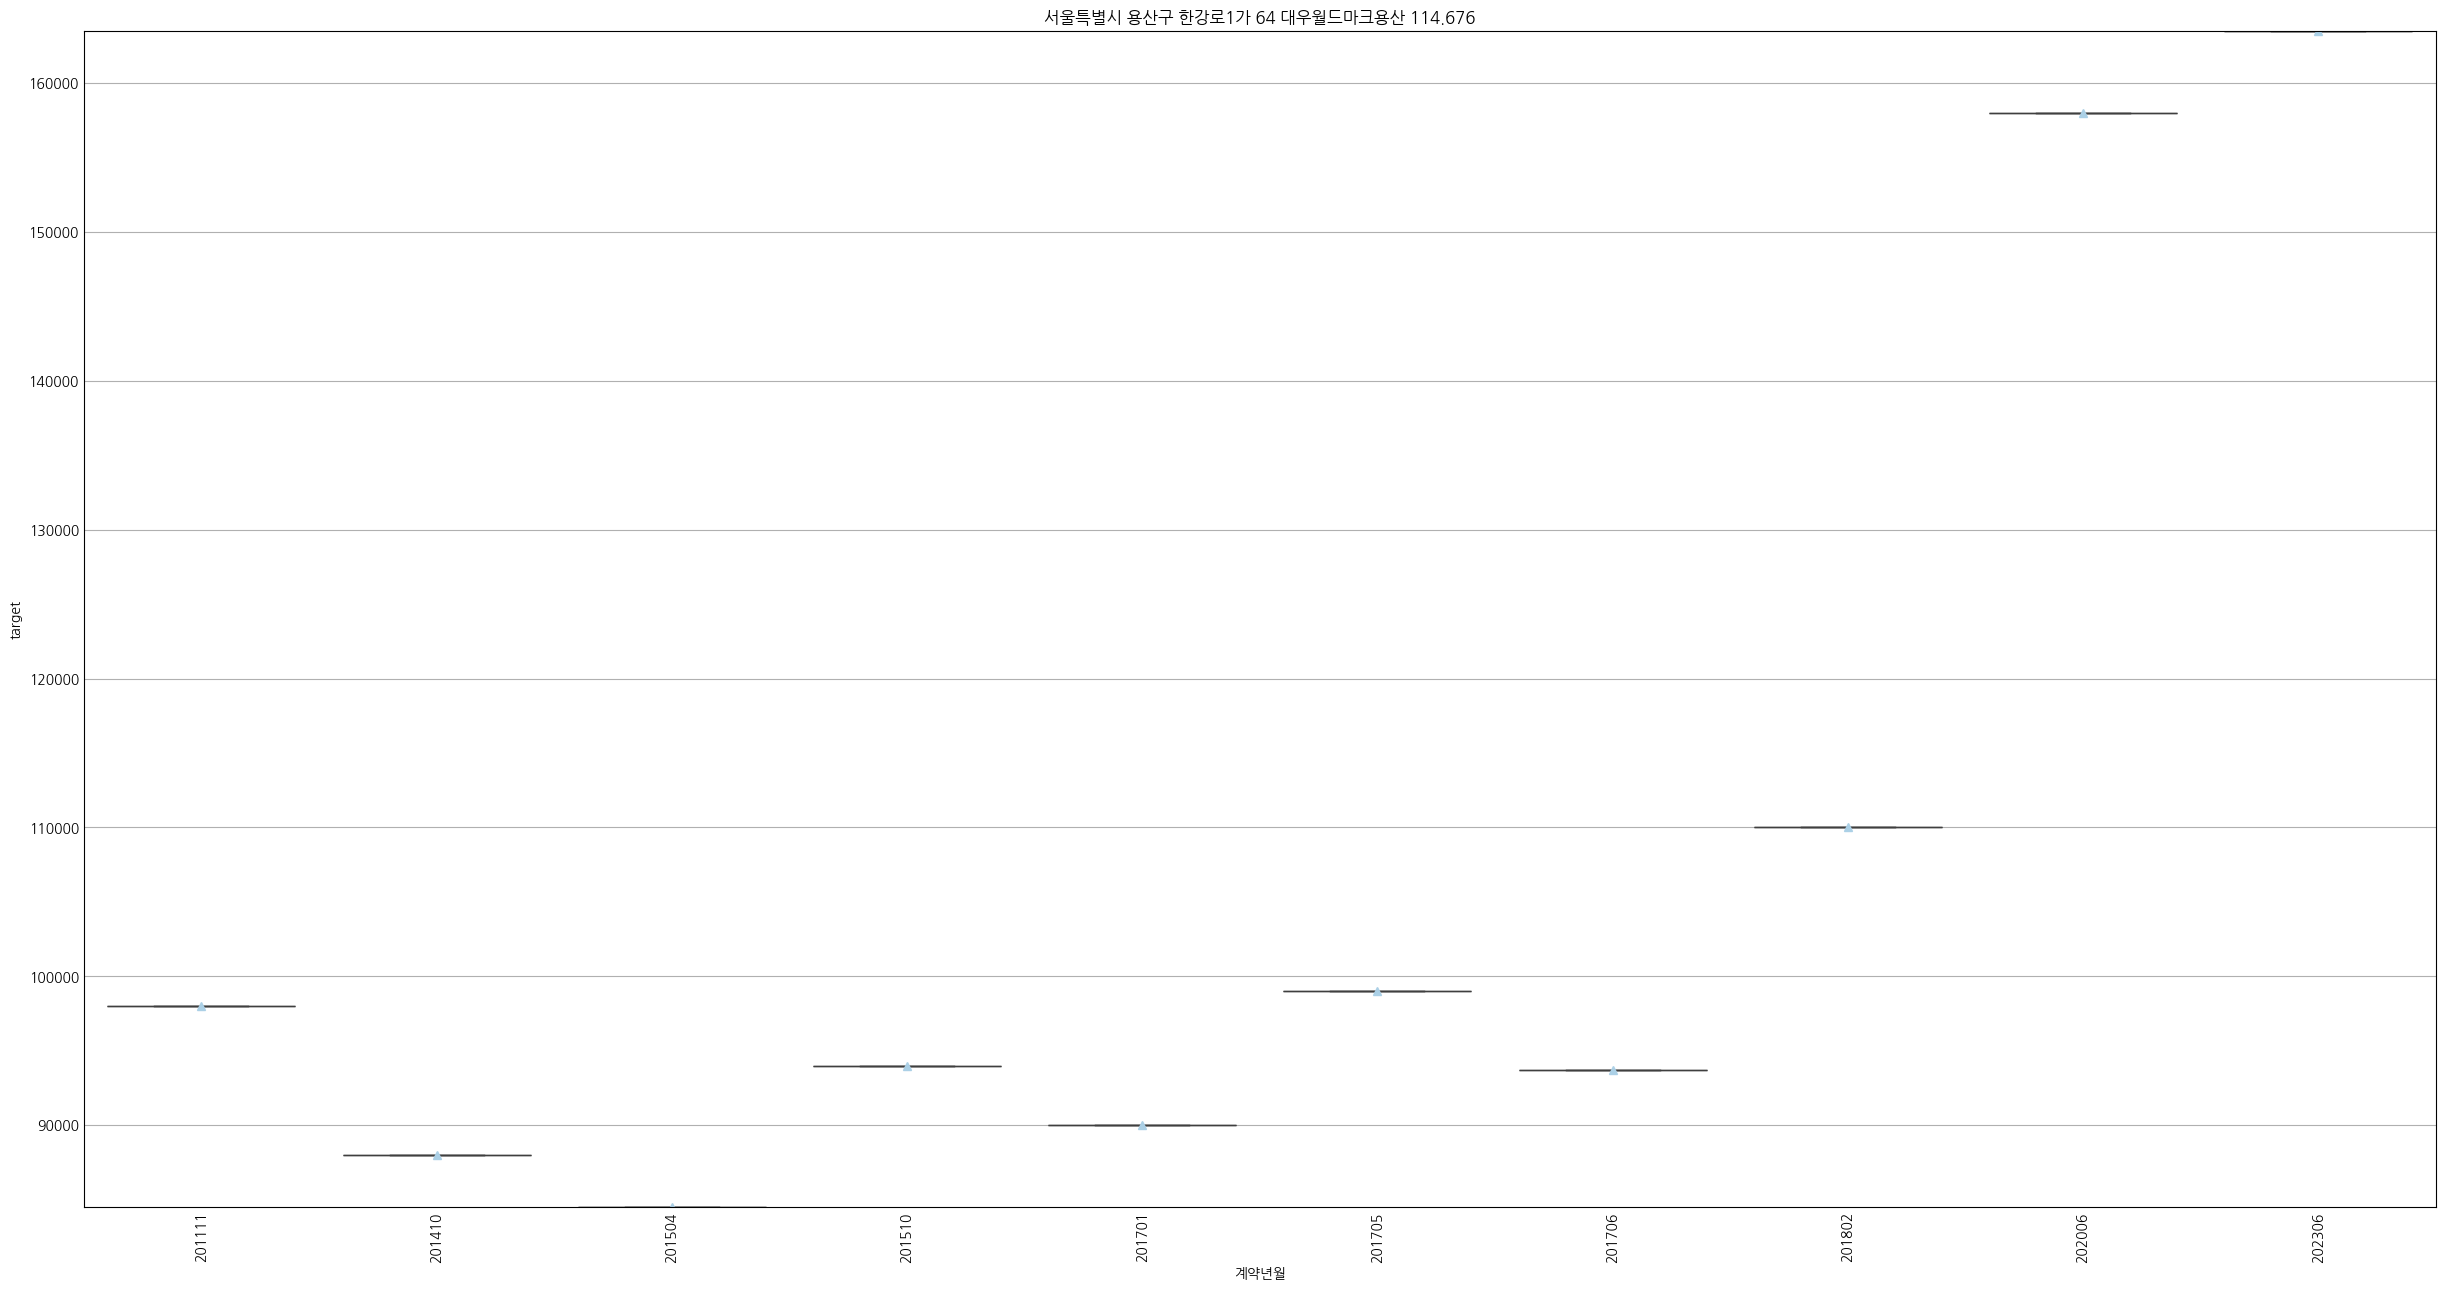

In [3103]:
### Ïù¥ÏÉÅÏπò Ï†úÍ±∞Ï†Ñ ÌôïÏù∏ Î∞ïÏä§Í∑∏ÎûòÌîÑ
plt.style.use('_mpl-gallery')
figure = plt.figure(figsize=(24, 12))
plt.title(title)

plt.ylim(final_data['target'].min(),final_data['target'].max())
plt.xticks(rotation=90)
sns.boxplot(x="Í≥ÑÏïΩÎÖÑÏõî", y="target", data=final_data, showmeans=True)

plt.show()

In [3104]:
### Í∞Å Í≥ÑÏïΩÎÖÑÏõîÎ≥ÑÎ°ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ ÌèâÍ∑† Í≥ÑÏÇ∞
data_cleaned = final_data.groupby('Íµ¨Î∂Ñdate').apply(lambda x: remove_outliers(x, 'target'))
data_cleaned = data_cleaned.reset_index(drop=True)

In [3105]:
### n Í∞ú Ïù¥ÏÉÅÏπòÍ∞Ä Ï†úÍ±∞Îê®
LEN1 = len(final_data)
LEN2 = len(data_cleaned)
LEN1, LEN2, len(final_data)-len(data_cleaned)

(10, 10, 0)

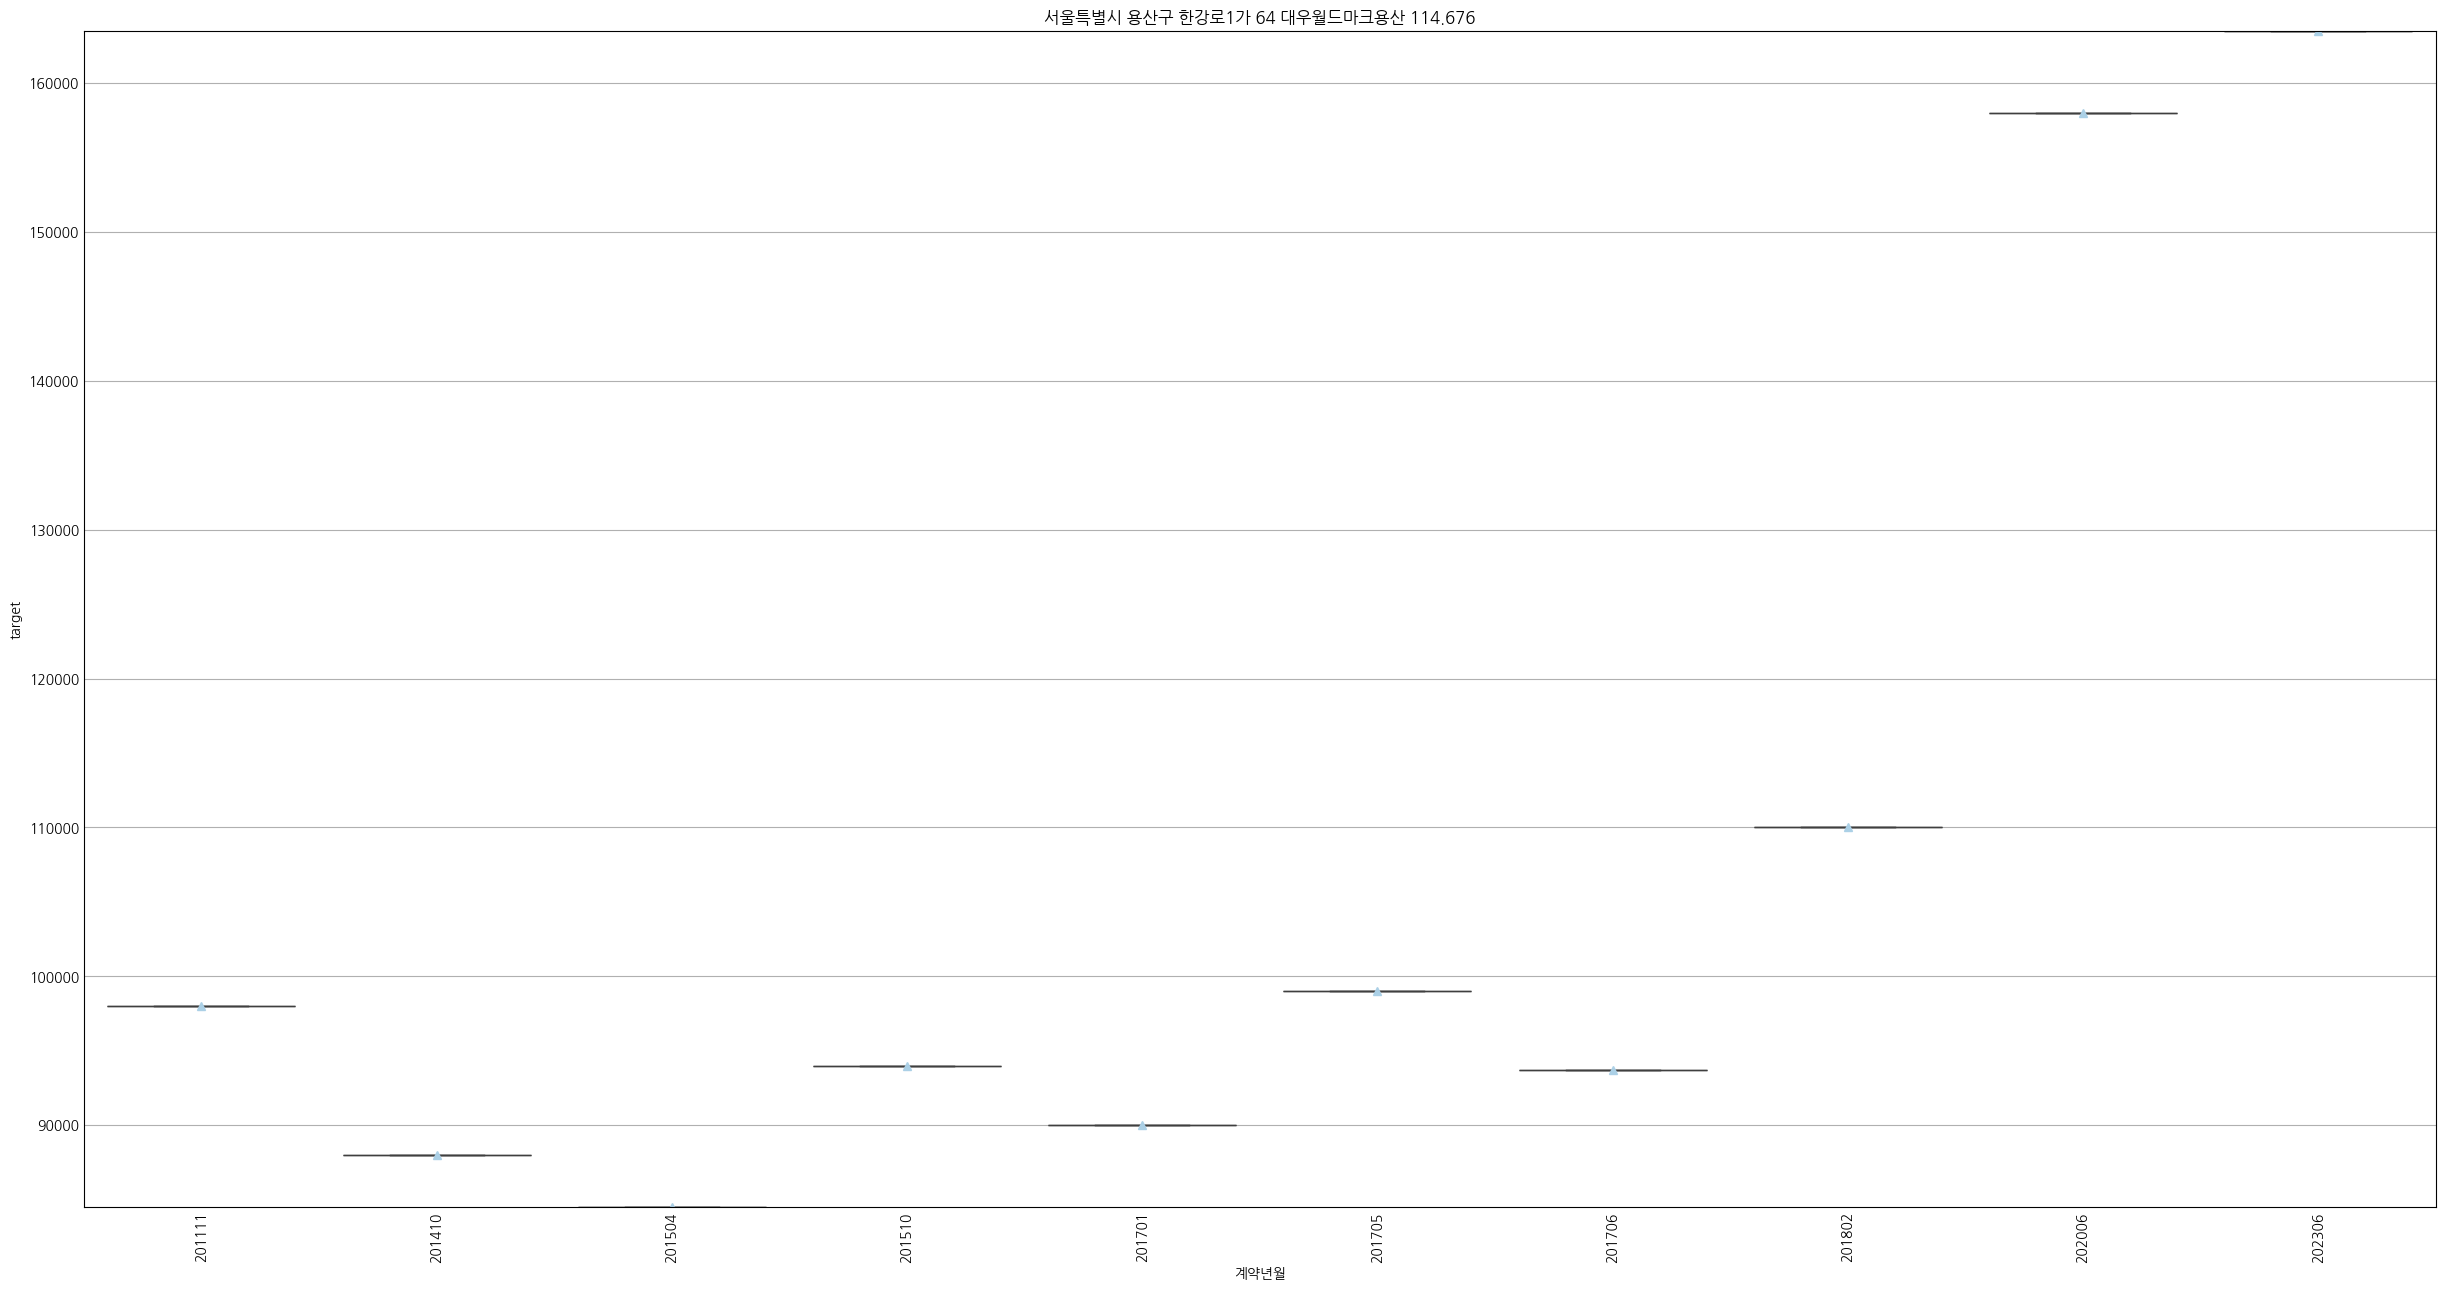

In [3106]:
### Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌõÑ ÌôïÏù∏ Î∞ïÏä§Í∑∏ÎûòÌîÑ
plt.style.use('_mpl-gallery')
figure = plt.figure(figsize=(24, 12))
plt.title(title)

plt.ylim(final_data['target'].min(),final_data['target'].max())
plt.xticks(rotation=90)
sns.boxplot(x="Í≥ÑÏïΩÎÖÑÏõî", y="target", data=data_cleaned, showmeans=True)

plt.show()

In [3107]:
### Î≥ÄÍ≤ΩÎÇ¥Ïö© ÌôïÏù∏
data_cleaned[['Íµ¨Î∂Ñdate', 'Í≥ÑÏïΩÎÖÑÏõî', 'target']].head(10)

Íµ¨Î∂Ñdate    Í≥ÑÏïΩÎÖÑÏõî  target
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201111  201111   98000
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201410  201410   88000
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201504  201504   84500
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201510  201510   94000
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201701  201701   90000
5  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201705  201705   99000
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201706  201706   93700
7  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201802  201802  110000
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 202006  202006  158000
9  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 202306  202306  163500

In [3108]:
### Í≥ÑÏïΩÎÖÑÏõî Î≥Ñ targetÏùò ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
mean_target = data_cleaned.groupby('Íµ¨Î∂Ñdate')['target'].mean().reset_index()
mean_target.columns = ['Íµ¨Î∂Ñdate', 'mean']

mean_target.head()

Íµ¨Î∂Ñdate     mean
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201111  98000.0
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201410  88000.0
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201504  84500.0
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201510  94000.0
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201701  90000.0

In [3109]:
### Ïù¥ÎèôÌèâÍ∑†Í≥º ÏßÄÏàòÏù¥ÎèôÌèâÍ∑†ÏùÑ Íµ¨ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
### SMAÏôÄ EMAÎäî Î™®Îëê ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Ï∂îÏÑ∏ ÏßÄÌëúÏûÖÎãàÎã§. SMAÎäî Î™®Îì† Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïóê ÎèôÏùºÌïú Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ÌïòÎäî Î∞òÎ©¥, EMAÎäî ÏµúÍ∑º Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïóê Îçî ÎßéÏùÄ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.

def moving_average(df,i, n):
    MA = pd.Series(df[i].rolling(n, min_periods=n).mean(), name = 'MA_' + str(n))
    df = df.join(MA)
    return df

def weighted_moving_average(df,i, n):
    EMA = pd.Series(df[i].ewm(span=n, adjust=False, min_periods=n).mean(), name = 'EMA_' + str(n))
    df = df.join(EMA)
    return df

In [3110]:
### Î≥ÄÏàòÎ•º ÏÉùÏÑ±
df_all = mean_target

# ÏãúÍ∞Ñ ÏãúÍ≥ÑÏó¥ Í∏∞Î∞ò Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
# Ïù¥Îèô ÌèâÍ∑†(Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
df_all = moving_average(df_all, 'mean', 3)
df_all = moving_average(df_all, 'mean', 6)

# ÏßÄÏàò Ïù¥Îèô ÌèâÍ∑†(Exponential Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
df_all = weighted_moving_average(df_all, 'mean', 3)
df_all = weighted_moving_average(df_all, 'mean', 6)

In [3111]:
### ÏÉùÏÑ±Î≥ÄÏàò ÌôïÏù∏
df_all[['Íµ¨Î∂Ñdate','mean', 'MA_3', 'MA_6', 'EMA_3','EMA_6']].head(10)

Íµ¨Î∂Ñdate      mean           MA_3  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201111   98000.0            NaN   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201410   88000.0            NaN   
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201504   84500.0   90166.666667   
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201510   94000.0   88833.333333   
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201701   90000.0   89500.000000   
5  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201705   99000.0   94333.333333   
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201706   93700.0   94233.333333   
7  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201802  110000.0  100900.000000   
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 202006  158000.0  120566.666667   
9  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 202306  163500.0  143833.333333   

            MA_6          EMA_3          EMA_6  
0            NaN            NaN            NaN  
1            NaN            NaN            NaN  
2            NaN   88750.000000            NaN  
3            NaN   91375.000000            NaN  
4            NaN   90687.500000            NaN  
5   92250.000000   94843.750000   93920.568811  
6   91533.333333   94271.875000   93857.549150  
7   95200.000000  102135.937500   98469.677965  
8  107450.000000  130067.968750  115478.341403  
9  119033.333333  146783.984375  129198.815288

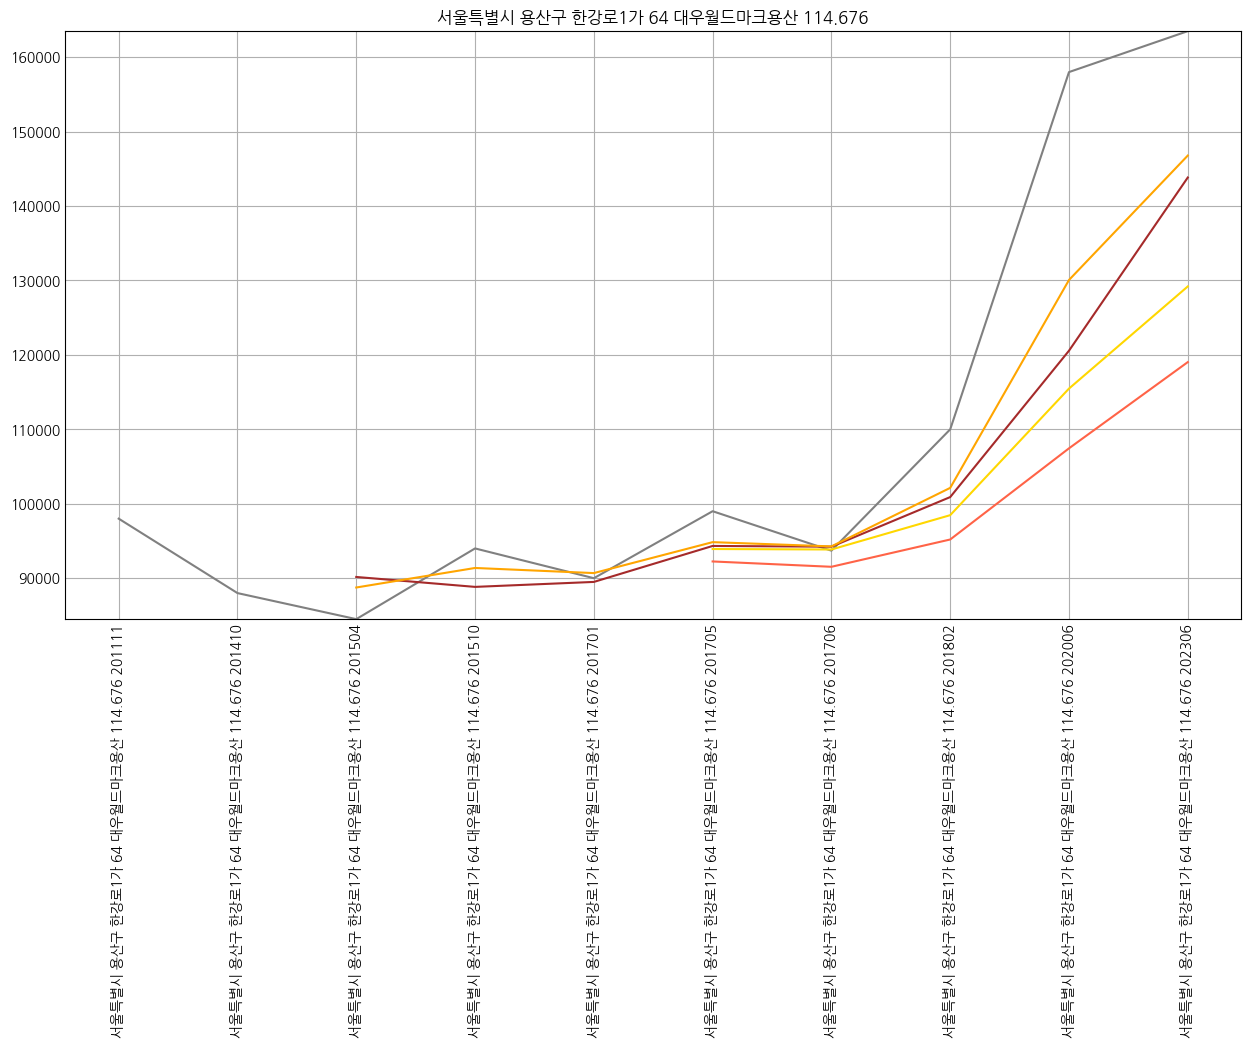

In [3112]:
plt.style.use('_mpl-gallery')
figure = plt.figure(figsize=(12, 6))
plt.title(title)

plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['mean'], color='gray')
plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['MA_3'], color='brown')
plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['MA_6'], color='tomato')
plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['EMA_3'], color='orange')
plt.plot(df_all['Íµ¨Î∂Ñdate'], df_all['EMA_6'], color='gold')

plt.ylim(final_data['target'].min(),final_data['target'].max())
plt.xticks(rotation=90)


plt.show()

In [3113]:
### Î≥ÄÌôîÏú® Ï∂îÍ∞Ä
# add 'pct_change_before' variable. This variable shows that how the density changed previous month.
df_all['pct_change_before'] = df_all['mean'].pct_change().shift(1)

In [3114]:
df_all

Íµ¨Î∂Ñdate      mean           MA_3  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201111   98000.0            NaN   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201410   88000.0            NaN   
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201504   84500.0   90166.666667   
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201510   94000.0   88833.333333   
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201701   90000.0   89500.000000   
5  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201705   99000.0   94333.333333   
6  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201706   93700.0   94233.333333   
7  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201802  110000.0  100900.000000   
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 202006  158000.0  120566.666667   
9  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 202306  163500.0  143833.333333   

            MA_6          EMA_3          EMA_6  pct_change_before  
0            NaN            NaN            NaN                NaN  
1            NaN            NaN            NaN                NaN  
2            NaN   88750.000000            NaN          -0.102041  
3            NaN   91375.000000            NaN          -0.039773  
4            NaN   90687.500000            NaN           0.112426  
5   92250.000000   94843.750000   93920.568811          -0.042553  
6   91533.333333   94271.875000   93857.549150           0.100000  
7   95200.000000  102135.937500   98469.677965          -0.053535  
8  107450.000000  130067.968750  115478.341403           0.173959  
9  119033.333333  146783.984375  129198.815288           0.436364

In [3115]:
### Î†àÍ∑∏Í∞í Ï∂îÍ∞Ä

# gnerate lag date

def lag_feature(df, value):
    for lag in range(1, value):
        df[f'lag_mean_{lag}'] = df['mean'].shift(lag)
        df[f'lag_mean_{lag}'] = df[f'lag_mean_{lag}'].bfill()

    return df

df_all = lag_feature(df_all, 6)


In [3116]:
# Í≤∞Í≥º ÌôïÏù∏
df_all.head()

Íµ¨Î∂Ñdate     mean          MA_3  MA_6  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201111  98000.0           NaN   NaN   
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201410  88000.0           NaN   NaN   
2  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201504  84500.0  90166.666667   NaN   
3  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201510  94000.0  88833.333333   NaN   
4  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 201701  90000.0  89500.000000   NaN   

     EMA_3  EMA_6  pct_change_before  lag_mean_1  lag_mean_2  lag_mean_3  \
0      NaN    NaN                NaN     98000.0     98000.0     98000.0   
1      NaN    NaN                NaN     98000.0     98000.0     98000.0   
2  88750.0    NaN          -0.102041     88000.0     98000.0     98000.0   
3  91375.0    NaN          -0.039773     84500.0     88000.0     98000.0   
4  90687.5    NaN           0.112426     94000.0     84500.0     88000.0   

   lag_mean_4  lag_mean_5  
0     98000.0     98000.0  
1     98000.0     98000.0  
2     98000.0     98000.0  
3     98000.0     98000.0  
4     98000.0     98000.0

In [3117]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 131848 to 221254
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ÏãúÍµ∞Íµ¨        10 non-null     object 
 1   Ï†ÑÏö©Î©¥Ï†Å       10 non-null     float64
 2   Í≥ÑÏïΩÎÖÑÏõî       10 non-null     int64  
 3   Ï∏µ          10 non-null     int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ       10 non-null     int64  
 5   ÎèÑÎ°úÎ™Ö        10 non-null     object 
 6   target     10 non-null     int64  
 7   is_test    10 non-null     int64  
 8   index_num  10 non-null     int64  
 9   Íµ¨Î∂Ñ         10 non-null     object 
 10  Íµ¨Î∂Ñdate     10 non-null     object 
 11  Íµ¨Î∂Ñnum      10 non-null     int64  
 12  Íµ¨          10 non-null     object 
 13  Îèô          10 non-null     object 
 14  Í≥ÑÏïΩÎÖÑ        10 non-null     object 
 15  Í≥ÑÏïΩÏõî        10 non-null     object 
 16  Í∞ïÎÇ®Ïó¨Î∂Ä       10 non-null     int64  
 17  Ïã†Ï∂ïÏó¨Î∂Ä       10 non-null     int64  
dtypes: flo

In [3118]:
# ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïóê ÏÉàÎ°úÎßåÎì† Î≥ÄÏàò Ï∂îÍ∞Ä
final_data = pd.merge(data_cleaned, df_all, on='Íµ¨Î∂Ñdate', how='left')


In [3119]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ÏãúÍµ∞Íµ¨                10 non-null     object 
 1   Ï†ÑÏö©Î©¥Ï†Å               10 non-null     float64
 2   Í≥ÑÏïΩÎÖÑÏõî               10 non-null     int64  
 3   Ï∏µ                  10 non-null     int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ               10 non-null     int64  
 5   ÎèÑÎ°úÎ™Ö                10 non-null     object 
 6   target             10 non-null     int64  
 7   is_test            10 non-null     int64  
 8   index_num          10 non-null     int64  
 9   Íµ¨Î∂Ñ                 10 non-null     object 
 10  Íµ¨Î∂Ñdate             10 non-null     object 
 11  Íµ¨Î∂Ñnum              10 non-null     int64  
 12  Íµ¨                  10 non-null     object 
 13  Îèô                  10 non-null     object 
 14  Í≥ÑÏïΩÎÖÑ                10 non-null     object 
 15  Í≥ÑÏïΩÏõî        

#### Í≥ÑÏÜç

In [3120]:
### Ìï®ÏàòÎ°ú ÎßåÎì§Í∏∞
def add_lag_feature(data): # df = ÏïÑÌååÌä∏Î≥Ñ Îç∞Ïù¥ÌÑ∞,
    data['Í≥ÑÏïΩÎÖÑÏõî'] = data['Í≥ÑÏïΩÎÖÑÏõî'].astype(int)
    final_data = data.sort_values(by=['Íµ¨Î∂Ñdate'])

    ### Í∞Å Í≥ÑÏïΩÎÖÑÏõîÎ≥ÑÎ°ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ ÌèâÍ∑† Í≥ÑÏÇ∞
    data_cleaned = final_data.groupby('Íµ¨Î∂Ñdate').apply(lambda x: remove_outliers(x, 'target'))
    data_cleaned = data_cleaned.reset_index(drop=True)

    mean_target = data_cleaned.groupby('Íµ¨Î∂Ñdate')['target'].mean().reset_index()
    mean_target.columns = ['Íµ¨Î∂Ñdate', 'mean']

    df_all = mean_target

    # ÏãúÍ∞Ñ ÏãúÍ≥ÑÏó¥ Í∏∞Î∞ò Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    # Ïù¥Îèô ÌèâÍ∑†(Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    df_all = moving_average(df_all, 'mean', 3)
    df_all = moving_average(df_all, 'mean', 6)

    # ÏßÄÏàò Ïù¥Îèô ÌèâÍ∑†(Exponential Moving Average) Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    df_all = weighted_moving_average(df_all, 'mean', 3)
    df_all = weighted_moving_average(df_all, 'mean', 6)

    df_all = lag_feature(df_all, 6)

    final_data = pd.merge(data_cleaned, df_all, on='Íµ¨Î∂Ñdate', how='left')

    return final_data

In [3121]:
# final_data.info()

In [3122]:
final_data['Íµ¨Î∂Ñnum'].value_counts()

Íµ¨Î∂Ñnum
30861    10
Name: count, dtype: int64

In [3123]:
#Î∏åÎ†àÏù¥ÌÅ¨
%%time
###
# 12200	'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94'
# Ï†ÑÏ≤¥ ÏïÑÌååÌä∏ Í∞úÏàò 30912
END = 30911
z = 0
#base = add_lag_feature(data.loc[data['Íµ¨Î∂Ñnum'] == 0])

for i in range(1, z):
    tmp = add_lag_feature(data.loc[data['Íµ¨Î∂Ñnum'] == i])
    print(end="\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b\b")

    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ìï©
    base = pd.concat([base, tmp], ignore_index=True)
    print("i:", i, "   tmp count:", len(tmp), "   base count:",len(base))


# 2ÏãúÍ∞Ñ 13Î∂Ñ 12Ï¥à Í±∏Î¶º
# Wall time: 2h 12min 12s 2024 07 17
#display(base)

CPU times: user 7 ¬µs, sys: 1 ¬µs, total: 8 ¬µs
Wall time: 11.9 ¬µs


#### base Î∂àÎü¨Ïò§Í∏∞

In [3124]:
#Ï†ÄÏû•ÌïòÍ∏∞# base.to_csv('/content/drive/MyDrive/AILAB_Advance/base.csv', index=False)

In [3125]:
# base = pd.read_csv('/content/drive/MyDrive/AILAB_Advance/base.csv')

In [3126]:
# base.info()

In [3127]:
# base.columns

In [3128]:
### mean Í∞íÎßå Ï∂îÎ†§ÏÑú ÌååÏùº ÎßåÎì§Ïñ¥ÏÑú Ï†ÑÎã¨
# base = base.sort_values(by=['recover_num'])
# base_mean=base[['Íµ¨Î∂Ñdate', 'recover_num', 'mean']]
# base_mean.to_csv('/content/drive/MyDrive/AILAB_Advance/base_mean.csv', index=False)

#base[base['is_test']==1]['mean']

In [3129]:
# base = base.sort_values(by=['recover_num'])

In [3130]:
### Îç∞Ïù¥ÌÑ∞ ÏàúÏÑú Í∞í merge ÏãúÌÇ§Í∏∞
#base2 = pd.merge(base, concat_select[['recover_num']], on='index', how='left')

In [3131]:
# len(base)

In [3132]:
# base.head()

In [3133]:
# display(base)

<font color=tomato>#### Í±∞ÎûòÎÖÑÎ≥ÑÎ°ú Í±∞ÎûòÎüâ ÌôïÏù∏Ìï¥Î≥¥Í∏∞
Ï†ÑÏ≤¥ Í±∞ÎûòÎüâ Î∂ÑÏùò ÏµúÍ∑º 1ÎÖÑ Í±∞ÎûòÎüâ, 3ÎÖÑ Í±∞ÎûòÎüâ 5ÎÖÑ Í±∞ÎûòÎüâ


## 5 . Model Training

- Ïù¥Ï†ú ÏúÑÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§Í≥º Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
- Î™®Îç∏ÎßÅÏóêÎäî `sklearn`Ïùò `RandomForest`Î•º Ïù¥Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - `RandomForest`Îäî Î∞∞ÍπÖ(Bagging)Ïùò ÏùºÏ¢ÖÏúºÎ°ú, ÌïôÏäµÏãúÌÇ§Îäî Îç∞Ïù¥ÌÑ∞ Îøê ÏïÑÎãàÎùº ÌäπÏÑ±Î≥ÄÏàò(X)Îì§ÎèÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ NÍ∞úÏùò Tree ÏÉùÏÑ±ÌïòÍ≥†, NÍ∞úÏùò TreeÏóêÏÑú Î∞úÏÉùÌïú OutputÏùÑ Voting(Î≤îÏ£ºÌòï, Î∂ÑÎ•òÎ¨∏Ï†ú)ÌïòÍ±∞ÎÇò, Average(Ïó∞ÏÜçÌòï, ÌöåÍ∑ÄÎ¨∏Ï†ú)Ìï¥ ÏµúÏ¢Ö Output ÏÉùÏÑ±Ìï©ÎãàÎã§.
  - Ïù¥Îäî High variance, Low bias ÏÉÅÌô©ÏóêÏÑú Î∂ÑÏÇ∞(Variance) Í∞êÏÜåÏóê ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§.

**<font color='gold'> Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ ÏûêÎèô**

In [3134]:
###Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
#
# before_data = base
#
before_data = final_data.copy()

In [3135]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ÏãúÍµ∞Íµ¨                10 non-null     object 
 1   Ï†ÑÏö©Î©¥Ï†Å               10 non-null     float64
 2   Í≥ÑÏïΩÎÖÑÏõî               10 non-null     int64  
 3   Ï∏µ                  10 non-null     int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ               10 non-null     int64  
 5   ÎèÑÎ°úÎ™Ö                10 non-null     object 
 6   target             10 non-null     int64  
 7   is_test            10 non-null     int64  
 8   index_num          10 non-null     int64  
 9   Íµ¨Î∂Ñ                 10 non-null     object 
 10  Íµ¨Î∂Ñdate             10 non-null     object 
 11  Íµ¨Î∂Ñnum              10 non-null     int64  
 12  Íµ¨                  10 non-null     object 
 13  Îèô                  10 non-null     object 
 14  Í≥ÑÏïΩÎÖÑ                10 non-null     object 
 15  Í≥ÑÏïΩÏõî        

In [3136]:
before_data.drop(columns=['index_num', 'Íµ¨Î∂Ñdate', 'Íµ¨Î∂Ñnum'], inplace=True)

In [3137]:
sorted_data = before_data

In [3138]:
### baseÎ°ú Îç∞Ïù¥ÌÑ∞ Î≥ÄÍ≤Ω
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = sorted_data.query('is_test==0')
dt_test = sorted_data.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(10, 25) (0, 25)


In [3139]:
dt_test.isna().sum()

ÏãúÍµ∞Íµ¨                  0.0
Ï†ÑÏö©Î©¥Ï†Å                 0.0
Í≥ÑÏïΩÎÖÑÏõî                 0.0
Ï∏µ                    0.0
Í±¥Ï∂ïÎÖÑÎèÑ                 0.0
ÎèÑÎ°úÎ™Ö                  0.0
target               0.0
Íµ¨Î∂Ñ                   0.0
Íµ¨                    0.0
Îèô                    0.0
Í≥ÑÏïΩÎÖÑ                  0.0
Í≥ÑÏïΩÏõî                  0.0
Í∞ïÎÇ®Ïó¨Î∂Ä                 0.0
Ïã†Ï∂ïÏó¨Î∂Ä                 0.0
mean                 0.0
MA_3                 0.0
MA_6                 0.0
EMA_3                0.0
EMA_6                0.0
pct_change_before    0.0
lag_mean_1           0.0
lag_mean_2           0.0
lag_mean_3           0.0
lag_mean_4           0.0
lag_mean_5           0.0
dtype: float64

In [3140]:
dt_test.head(1)

Empty DataFrame
Columns: [ÏãúÍµ∞Íµ¨, Ï†ÑÏö©Î©¥Ï†Å, Í≥ÑÏïΩÎÖÑÏõî, Ï∏µ, Í±¥Ï∂ïÎÖÑÎèÑ, ÎèÑÎ°úÎ™Ö, target, Íµ¨Î∂Ñ, Íµ¨, Îèô, Í≥ÑÏïΩÎÖÑ, Í≥ÑÏïΩÏõî, Í∞ïÎÇ®Ïó¨Î∂Ä, Ïã†Ï∂ïÏó¨Î∂Ä, mean, MA_3, MA_6, EMA_3, EMA_6, pct_change_before, lag_mean_1, lag_mean_2, lag_mean_3, lag_mean_4, lag_mean_5]
Index: []

In [3141]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

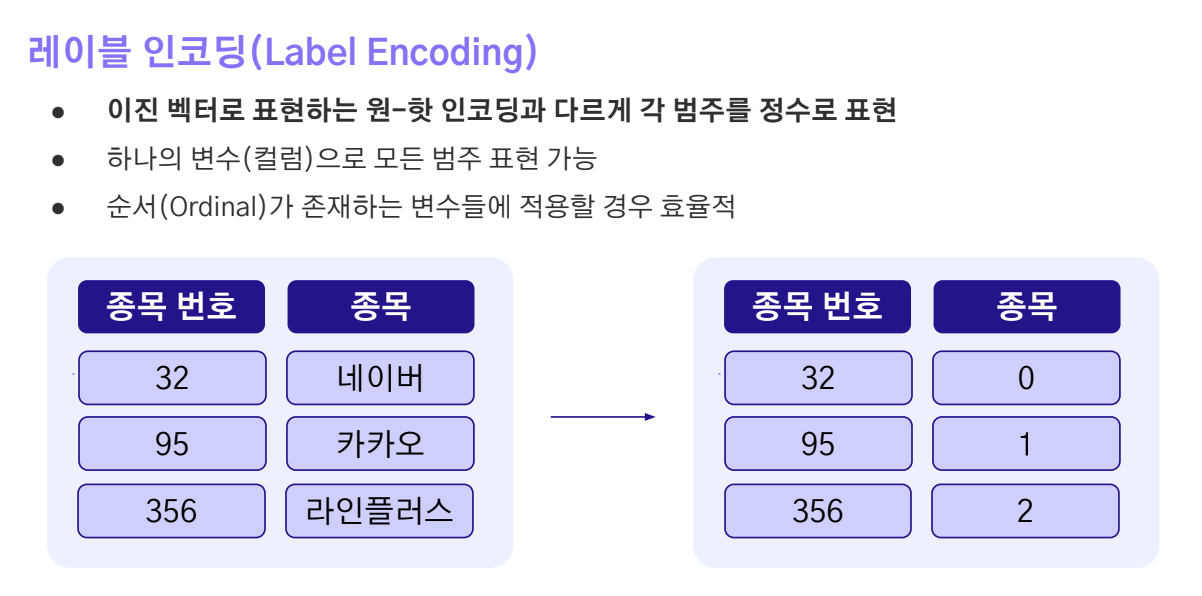

In [3142]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'target', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'mean', 'MA_3', 'MA_6', 'EMA_3', 'EMA_6', 'pct_change_before', 'lag_mean_1', 'lag_mean_2', 'lag_mean_3', 'lag_mean_4', 'lag_mean_5']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'ÎèÑÎ°úÎ™Ö', 'Íµ¨Î∂Ñ', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî']


In [3143]:
### ÏïÑÎûò Î†àÏù¥Î∏îÏù∏ÏΩîÎî© 8Î∂Ñ2Ï¥à Í±∏Î¶º

In [3144]:
%%time
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:00<00:00, 537.35it/s]

CPU times: user 18.3 ms, sys: 1.94 ms, total: 20.2 ms
Wall time: 21.3 ms


In [3145]:
dt_train.head(1)        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

ÏãúÍµ∞Íµ¨     Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  ÎèÑÎ°úÎ™Ö  target  Íµ¨Î∂Ñ  Íµ¨  Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  \
0    0  114.676  201111  21  2007    0   98000   0  0  0    0    6     0   

   Ïã†Ï∂ïÏó¨Î∂Ä     mean  MA_3  MA_6  EMA_3  EMA_6  pct_change_before  lag_mean_1  \
0     0  98000.0   NaN   NaN    NaN    NaN                NaN     98000.0   

   lag_mean_2  lag_mean_3  lag_mean_4  lag_mean_5  
0     98000.0     98000.0     98000.0     98000.0

In [3146]:
### ÎÇ¥Ïö©Î≥¥Í∏∞
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ÏãúÍµ∞Íµ¨                10 non-null     int64  
 1   Ï†ÑÏö©Î©¥Ï†Å               10 non-null     float64
 2   Í≥ÑÏïΩÎÖÑÏõî               10 non-null     int64  
 3   Ï∏µ                  10 non-null     int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ               10 non-null     int64  
 5   ÎèÑÎ°úÎ™Ö                10 non-null     int64  
 6   target             10 non-null     int64  
 7   Íµ¨Î∂Ñ                 10 non-null     int64  
 8   Íµ¨                  10 non-null     int64  
 9   Îèô                  10 non-null     int64  
 10  Í≥ÑÏïΩÎÖÑ                10 non-null     int64  
 11  Í≥ÑÏïΩÏõî                10 non-null     int64  
 12  Í∞ïÎÇ®Ïó¨Î∂Ä               10 non-null     int64  
 13  Ïã†Ï∂ïÏó¨Î∂Ä               10 non-null     int64  
 14  mean               10 non-null     float64
 15  MA_3    

### 5.2. Model Training
- ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ train Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Î™®Îç∏ÏùÄ RandomForestÎ•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
- TrainÍ≥º Valid datasetÏùÑ Î∂ÑÌï†ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎäî `holdout` Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Î∞©Î≤ïÏùò Í≤ΩÏö∞  ÎåÄÎûµÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Îπ†Î•¥Í≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú baselineÏóêÏÑú ÏÇ¨Ïö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïù¥ ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ edaÎ•º ÌÜµÌï¥ÏÑú ÌèâÍ∞ÄÏÑ∏Ìä∏ÏôÄ Í≤ΩÌñ•ÏùÑ ÎßûÏ∂îÍ±∞ÎÇò kfoldÏôÄ Í∞ôÏùÄ Î∂ÑÌè¨Ïóê ÎåÄÌïú Í≥†Î†§Î•º Ï∂îÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [3147]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

In [3148]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [3149]:
X_train.fillna(method='bfill', inplace=True)
X_train.fillna(method='ffill', inplace=True)
X_val.fillna(method='bfill', inplace=True)
X_val.fillna(method='ffill', inplace=True)

y_train.fillna(method='bfill', inplace=True)
y_train.fillna(method='ffill', inplace=True)
y_val.fillna(method='bfill', inplace=True)
y_val.fillna(method='ffill', inplace=True)

In [3150]:
%%time
# RandomForestRegressorÎ•º Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
### Ï†ÑÏ≤¥ 4Î∂ÑÍ±∏Î¶º
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

CPU times: user 30 ms, sys: 93 ¬µs, total: 30.1 ms
Wall time: 41.5 ms


- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäî Í≤ÉÎèÑ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [3151]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.

# Ï†ÑÏ≤¥Ïóê ÎåÄÌï¥ RMSE test: 2262.0626330912496

R = f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}'
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 22368.392879239225


###### baseline - RMSE test: 5851.882141463051




```
<class 'pandas.core.frame.DataFrame'>
Index: 1038846 entries, 0 to 9271
Data columns (total 49 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Î≤àÏßÄ                      1038846 non-null  object
 1   Î≥∏Î≤à                      1038846 non-null  object
 2   Î∂ÄÎ≤à                      1038846 non-null  object
 3   ÏïÑÌååÌä∏Î™Ö                    1038846 non-null  object
 4   Ï†ÑÏö©Î©¥Ï†Å                    1038846 non-null  float64
 5   Í≥ÑÏïΩÏùº                     1038846 non-null  int64  
 6   Ï∏µ                       1038846 non-null  int64  
 7   Í±¥Ï∂ïÎÖÑÎèÑ                    1038846 non-null  int64  
 8   ÎèÑÎ°úÎ™Ö                     1038846 non-null  object
 9   k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      1038846 non-null  object
 10  k-Ï†ÑÌôîÎ≤àÌò∏                  1038846 non-null  object
 11  k-Ìå©Ïä§Î≤àÌò∏                  1038846 non-null  object
 12  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)            1038846 non-null  object
 13  k-Í¥ÄÎ¶¨Î∞©Ïãù                  1038846 non-null  object
 14  k-Î≥µÎèÑÏú†Ìòï                  1038846 non-null  object
 15  k-ÎÇúÎ∞©Î∞©Ïãù                  1038846 non-null  object
 16  k-Ï†ÑÏ≤¥ÎèôÏàò                  1038846 non-null  float64
 17  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 1038846 non-null  float64
 18  k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)              1038846 non-null  object
 19  k-ÏãúÌñâÏÇ¨                   1038846 non-null  object
 20  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº           1038846 non-null  object
 21  k-Ïó∞Î©¥Ï†Å                   1038846 non-null  float64
 22  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                1038846 non-null  float64
 23  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å               1038846 non-null  float64
 24  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)      1038846 non-null  float64
 25  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  1038846 non-null  float64
 26  k-85„é°~135„é°Ïù¥Ìïò            1038846 non-null  float64
 27  k-ÏàòÏ†ïÏùºÏûê                  1038846 non-null  object
 28  Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏                1038846 non-null  object
 29  Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                 1038846 non-null  object
 30  ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï                1038846 non-null  object
 31  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                 1038846 non-null  object
 32  Í±¥Ï∂ïÎ©¥Ï†Å                    1038846 non-null  float64
 33  Ï£ºÏ∞®ÎåÄÏàò                    1038846 non-null  float64
 34  Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4     1038846 non-null  object
 35  Îã®ÏßÄÏäπÏù∏Ïùº                   1038846 non-null  object
 36  ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä                  1038846 non-null  object
 37  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú                 1038846 non-null  object
 38  Ï¢åÌëúX                     1038846 non-null  float64
 39  Ï¢åÌëúY                     1038846 non-null  float64
 40  Îã®ÏßÄÏã†Ï≤≠Ïùº                   1038846 non-null  object
 41  target                  1038846 non-null  float64
 42  is_test                 1038846 non-null  int64  
 43  Íµ¨                       1038846 non-null  object
 44  Îèô                       1038846 non-null  object
 45  Í≥ÑÏïΩÎÖÑ                     1038846 non-null  object
 46  Í≥ÑÏïΩÏõî                     1038846 non-null  object
 47  Í∞ïÎÇ®Ïó¨Î∂Ä                    1038846 non-null  int64  
 48  Ïã†Ï∂ïÏó¨Î∂Ä                    1038846 non-null  int64  
dtypes: float64(14), int64(6), object(29)
memory usage: 396.3+ MB```



###### base - RMSE test: 5708.848177198493


```
<class 'pandas.core.frame.DataFrame'>
Index: 1038846 entries, 0 to 1128093
Data columns (total 15 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   ÏãúÍµ∞Íµ¨      1038846 non-null  object
 1   Ï†ÑÏö©Î©¥Ï†Å     1038846 non-null  float64
 2   Í≥ÑÏïΩÎÖÑÏõî     1038846 non-null  int64  
 3   Ï∏µ        1038846 non-null  int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ     1038846 non-null  int64  
 5   ÎèÑÎ°úÎ™Ö      1038846 non-null  object
 6   target   1038846 non-null  int64  
 7   is_test  1038846 non-null  int64  
 8   Íµ¨Î∂Ñ       1038846 non-null  object
 9   Íµ¨        1038846 non-null  object
 10  Îèô        1038846 non-null  object
 11  Í≥ÑÏïΩÎÖÑ      1038846 non-null  object
 12  Í≥ÑÏïΩÏõî      1038846 non-null  object
 13  Í∞ïÎÇ®Ïó¨Î∂Ä     1038846 non-null  int64  
 14  Ïã†Ï∂ïÏó¨Î∂Ä     1038846 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 126.8+ MB
```



###### sample1 - RMSE test: 1956.034578860734
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94	- 2100Í∞ú

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ÏãúÍµ∞Íµ¨                2100 non-null   object
 1   Ï†ÑÏö©Î©¥Ï†Å               2100 non-null   float64
 2   Í≥ÑÏïΩÎÖÑÏõî               2100 non-null   int64  
 3   Ï∏µ                  2100 non-null   int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ               2100 non-null   int64  
 5   ÎèÑÎ°úÎ™Ö                2100 non-null   object
 6   target             2100 non-null   int64  
 7   is_test            2100 non-null   int64  
 8   index_num          2100 non-null   int64  
 9   Íµ¨Î∂Ñ                 2100 non-null   object
 10  Íµ¨Î∂Ñdate             2100 non-null   object
 11  Íµ¨Î∂Ñnum              2100 non-null   int64  
 12  Íµ¨                  2100 non-null   object
 13  Îèô                  2100 non-null   object
 14  Í≥ÑÏïΩÎÖÑ                2100 non-null   object
 15  Í≥ÑÏïΩÏõî                2100 non-null   object
 16  Í∞ïÎÇ®Ïó¨Î∂Ä               2100 non-null   int64  
 17  Ïã†Ï∂ïÏó¨Î∂Ä               2100 non-null   int64  
 18  mean               2100 non-null   float64
 19  MA_3               2091 non-null   float64
 20  MA_6               2075 non-null   float64
 21  EMA_3              2091 non-null   float64
 22  EMA_6              2075 non-null   float64
 23  pct_change_before  2089 non-null   float64
 24  lag_mean_1         2100 non-null   float64
 25  lag_mean_2         2100 non-null   float64
 26  lag_mean_3         2100 non-null   float64
 27  lag_mean_4         2100 non-null   float64
 28  lag_mean_5         2100 non-null   float64
dtypes: float64(12), int64(9), object(8)
memory usage: 475.9+ KB
```



###### sample2 - RMSE test: 928.7904230332273
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ Ï§ëÍ≥ÑÎèô 369 Ï£ºÍ≥µ2 44.52	  1949Í∞ú



```
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ Ï§ëÍ≥ÑÎèô 369 Ï£ºÍ≥µ2 44.52 Ïùò  1949 Í±¥Ïùò Îß§Îß§ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

<class 'pandas.core.frame.DataFrame'>
Index: 1949 entries, 36935 to 1122171
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ÏãúÍµ∞Íµ¨        1949 non-null   object
 1   Ï†ÑÏö©Î©¥Ï†Å       1949 non-null   float64
 2   Í≥ÑÏïΩÎÖÑÏõî       1949 non-null   int64  
 3   Ï∏µ          1949 non-null   int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ       1949 non-null   int64  
 5   ÎèÑÎ°úÎ™Ö        1949 non-null   object
 6   target     1949 non-null   int64  
 7   is_test    1949 non-null   int64  
 8   index_num  1949 non-null   int64  
 9   Íµ¨Î∂Ñ         1949 non-null   object
 10  Íµ¨Î∂Ñdate     1949 non-null   object
 11  Íµ¨Î∂Ñnum      1949 non-null   int64  
 12  Íµ¨          1949 non-null   object
 13  Îèô          1949 non-null   object
 14  Í≥ÑÏïΩÎÖÑ        1949 non-null   object
 15  Í≥ÑÏïΩÏõî        1949 non-null   object
 16  Í∞ïÎÇ®Ïó¨Î∂Ä       1949 non-null   int64  
 17  Ïã†Ï∂ïÏó¨Î∂Ä       1949 non-null   int64  
dtypes: float64(1), int64(9), object(8)
memory usage: 289.3+ KB```



###### sample3 - RMSE test: 5362.7367167363345

ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Ïû†Ïã§Îèô 22 Î¶¨ÏÑºÏ∏† 84.99

###### baseline - RMSE test: 5708.848177198493


<font color=gold> ###### ÏµúÏÉÅÏúÑÍ∂å

sample1 - RMSE test: 1956.034578860734
ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÎèÑÎ¥âÎèô 30-1 ÌïúÏã† 84.94   2168Í∞ú

sample2 - RMSE test: 928.7904230332273 ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ Ï§ëÍ≥ÑÎèô 369 Ï£ºÍ≥µ2 44.52   1949Í∞ú

sample3 - RMSE test: 5362.7367167363345 ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Ïû†Ïã§Îèô 22 Î¶¨ÏÑºÏ∏† 84.99   1755Í∞ú

sample4 - RMSE test: 919.3049896229531  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ Ï∞ΩÎèô 38 Ï£ºÍ≥µ17Îã®ÏßÄ 36.16   1722Í∞ú

sample5 - RMSE test: 1172.001849879784  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎ∂ÅÍµ¨ ÎØ∏ÏïÑÎèô 1353 ÏóêÏä§ÏºÄÏù¥Î∂ÅÌïúÏÇ∞ÏãúÌã∞ 59.98   1719

<font color=orange> Í±∞ÎûòÍ±¥Ïàò 600Í±¥ÎåÄ

sample6 - RMSE test: 2952.341946960295  101Î≤à 655Í±¥

sample7 -  RMSE test: 1329.067710548686  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Í∞úÎ¥âÎèô 478 ÌïúÏßÑ 59.95 102 Î≤à  -  653 Í±¥ Ï§ëÏóê 617 Í±¥

sample8 -  RMSE test: 1527.3076939127427  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÎåÄÎ¨∏Íµ¨ Ïù¥Î¨∏Îèô 64 ÏåçÏö© 59.99 103 Î≤à  -  651 Í±¥ Ï§ëÏóê 618 Í±¥

sample9 - RMSE test: 1557.371511223168   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ Î∞©ÌïôÎèô 271-1 Ïã†ÎèôÏïÑ 70.62 104 Î≤à  -  646 Í±¥ Ï§ëÏóê 622 Í±¥

sample_ - RMSE test: 3606.2784894427346   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í¥ëÏßÑÍµ¨ Íµ¨ÏùòÎèô 611 Íµ¨ÏùòÌòÑÎåÄ2Îã®ÏßÄ 84.91 105 Î≤à  -  642 Í±¥ Ï§ëÏóê 596 Í±¥



<font color=orange> Í±∞ÎûòÍ±¥Ïàò 200Í±¥ÎåÄ

sample11 -  RMSE test: 15132.007296849579  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïó≠ÏÇºÎèô 757 Ïó≠ÏÇºÎûòÎØ∏Ïïà 80.87 1153 Î≤à  -  200 Í±¥ Ï§ëÏóê 195 Í±¥

sample12 -  RMSE test: 3391.7963107585356  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±ÎèôÍµ¨ Ïò•ÏàòÎèô 428 Í∑πÎèô 68.58 1154 Î≤à  -  200 Í±¥ Ï§ëÏóê 194 Í±¥

sample13 -  RMSE test: 2679.996417908054  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨ ÏñëÌèâÎèô3Í∞Ä 90-1 Í±∞ÏÑ±ÌååÏä§ÌÖî 84.99 1155 Î≤à  -  200 Í±¥ Ï§ëÏóê 198 Í±¥

sample14 -  RMSE test: 5560.786874405824  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÇºÏÑ±Îèô 16-2 ÏÇºÏÑ±ÎèôÌûêÏä§ÌÖåÏù¥Ìä∏ 1Îã®ÏßÄ 84.236 1156 Î≤à  -  200 Í±¥ Ï§ëÏóê 196 Í±¥

sample15 -  RMSE test: 2499.8743361237694  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎèôÍµ¨ ÎëîÏ¥åÎèô 630 ÎëîÏ¥åÌë∏Î•¥ÏßÄÏò§ 84.9 1157 Î≤à  -  200 Í±¥ Ï§ëÏóê 196 Í±¥


<font color=orange> Í±∞ÎûòÍ±¥Ïàò 100Í±¥ÎåÄ

sample16 - RMSE test: 1955.8565898347456   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÎûëÍµ¨ Î©¥Î™©Îèô 1522 ÎëêÏÇ∞4 84.86 2687 Î≤à  -  100 Í±¥ Ï§ëÏóê 100 Í±¥

sample17 - RMSE test: 1228.3371777416096   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ ÏõîÍ≥ÑÎèô 780 Ï≤≠Î∞±3 59.4 2688 Î≤à  -  100 Í±¥ Ï§ëÏóê 100 Í±¥

sample18 - RMSE test: 1595.1461375059027   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨ Ï†ïÎ¶âÎèô 809 Ï†ïÎ¶âÏ§ëÏïôÌïòÏù¥Ï∏† 59.26 2689 Î≤à  -  100 Í±¥ Ï§ëÏóê 100 Í±¥

sample19 - RMSE test: 2555.037181725542   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Î∞©Ïù¥Îèô 157 Î∞©Ïù¥Í∏àÌò∏Ïñ¥Ïö∏Î¶º 84.3 2690 Î≤à  -  100 Í±¥ Ï§ëÏóê 97 Í±¥

sample20 - RMSE test: 3081.0866589565444   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Ïã†Ï†ïÎèô 1296 ÏïÑÏù¥ÌååÌÅ¨ 59.82 2691 Î≤à  -  100 Í±¥ Ï§ëÏóê 100 Í±¥


<font color=orange> Í±∞ÎûòÍ±¥Ïàò 50Í±¥ÎåÄ

sample21 - RMSE test: 1602.235937682088   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Í≥†Ï≤ôÎèô 323 Í∑∏ÎûúÎìú 57.74 4923 Î≤à  -  50 Í±¥ Ï§ëÏóê 50 Í±¥

sample22 - RMSE test: 9043.90402425855   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨ ÎèôÏÜåÎ¨∏Îèô7Í∞Ä 120 Î∏åÎùºÏö¥Ïä§ÌÜ§ÎèôÏÑ† 84.96 4924 Î≤à  -  50 Í±¥ Ï§ëÏóê 50 Í±¥

sample23 - RMSE test: 2118.0816792560195   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨ ÏÉÅÎèÑÎèô 445 Í≤ΩÌñ•Î†âÏä§Îπå 114.6534 4925 Î≤à  -  50 Í±¥ Ï§ëÏóê 50 Í±¥

sample24 - RMSE test: 1735.407733070243   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Í∞ÄÎ¶¨Î¥âÎèô 139 Ìö®ÏÑ± 84.87 4926 Î≤à  -  50 Í±¥ Ï§ëÏóê 50 Í±¥

sample25 - RMSE test: 732.2977536494292   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Í≥†Ï≤ôÎèô 57-9 ÏÇ∞ÏóÖÏù∏ 47.23 4927 Î≤à  -  50 Í±¥ Ï§ëÏóê 50 Í±¥


<font color=orange> Í±∞ÎûòÍ±¥Ïàò 20Í±¥ÎåÄ

sample_ - RMSE test: 2556.755756813701   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨ ÎèÖÏÇ∞Îèô 1147 Í∏àÏ≤úÎ°ØÎç∞Ï∫êÏä¨Í≥®ÎìúÌååÌÅ¨1Ï∞® 72.5249 8529 Î≤à  -  20 Í±¥ Ï§ëÏóê 20 Í±¥

sample_ - RMSE test: 3017.316688715323   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨ ÎèÑÎ¶ºÎèô 165-1 ÎèôÏïÑÏóêÏΩîÎπå 59.94 8530 Î≤à  -  20 Í±¥ Ï§ëÏóê 20 Í±¥

sample_ - RMSE test: 771.3624310270757   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÏåçÎ¨∏Îèô 727 ÌååÎùºÎã§Ïù¥Ïä§Îπå 84.61 8531 Î≤à  -  20 Í±¥ Ï§ëÏóê 20 Í±¥

sample_ - RMSE test: 6585.780136020333   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ï≤≠Îã¥Îèô 14 Ï≤≠Îã¥2Ï∞®Ïù¥-Ìé∏ÌïúÏÑ∏ÏÉÅ 101.7 8532 Î≤à  -  20 Í±¥ Ï§ëÏóê 20 Í±¥

sample_ - RMSE test: 719.8784619642402   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Ïã†ÏõîÎèô 1016 ÏõêÎä•ÌïúÎπõ 84.1 8533 Î≤à  -  20 Í±¥ Ï§ëÏóê 20 Í±¥


<font color=orange> Í±∞ÎûòÍ±¥Ïàò 10Í±¥ÎåÄ

sample - RMSE test: 6398.577967017359   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ Î¨∏Ï†ïÎèô 68-15 ÏòàÍ∑∏Î¶¨ÎÇò 82.72 12491 Î≤à  -  10 Í±¥ Ï§ëÏóê 10 Í±¥

sample - RMSE test: 22368.392879239225   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 12492 Î≤à  -  10 Í±¥ Ï§ëÏóê 10 Í±¥

sample - RMSE test: 3222.235249015813   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±Î∂ÅÍµ¨ Ï†ïÎ¶âÎèô 822-1 ÎåÄÏõê 81.17 12496 Î≤à  -  10 Í±¥ Ï§ëÏóê 10 Í±¥

sample - RMSE test: 9445.782127489496   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÎåÄÎ¨∏Íµ¨ Ïù¥Î¨∏Îèô 425 Ïù¥Î¨∏ÏÇºÏÑ±ÎûòÎØ∏Ïïà 84.991 12497 Î≤à  -  10 Í±¥ Ï§ëÏóê 10 Í±¥

sample - RMSE test: 2340.6836608136523   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ ÎßùÏõêÎèô 495 Ïã†Î∂Ä3Ï∞®ÌååÏä§Ïπ¥ 59.94 12498 Î≤à  -  10 Í±¥ Ï§ëÏóê 10 Í±¥

sample - RMSE test: 862.670273047588   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèÑÎ¥âÍµ¨ ÏåçÎ¨∏Îèô 54 ÌòÑÎåÄ1 63.36 12499 Î≤à  -  10 Í±¥ Ï§ëÏóê 10 Í±¥

sample - RMSE test: 2825.146013925652   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Ïã†Ï†ïÎèô 916-15 Ïã¨ÎØ∏ 81.88 12500 Î≤à  -  10 Í±¥ Ï§ëÏóê 10 Í±¥



In [3152]:
print("sample_ -",R ,' ', title, NUM, 'Î≤à  - ', LEN1, 'Í±¥ Ï§ëÏóê', LEN2, 'Í±¥')

sample_ - RMSE test: 22368.392879239225   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676 12492 Î≤à  -  10 Í±¥ Ï§ëÏóê 10 Í±¥


###### base2

In [3153]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038846 entries, 0 to 1128093
Data columns (total 18 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ÏãúÍµ∞Íµ¨        1038846 non-null  object 
 1   Ï†ÑÏö©Î©¥Ï†Å       1038846 non-null  float64
 2   Í≥ÑÏïΩÎÖÑÏõî       1038846 non-null  int64  
 3   Ï∏µ          1038846 non-null  int64  
 4   Í±¥Ï∂ïÎÖÑÎèÑ       1038846 non-null  int64  
 5   ÎèÑÎ°úÎ™Ö        1038846 non-null  object 
 6   target     1038846 non-null  int64  
 7   is_test    1038846 non-null  int64  
 8   index_num  1038846 non-null  int64  
 9   Íµ¨Î∂Ñ         1038846 non-null  object 
 10  Íµ¨Î∂Ñdate     1038846 non-null  object 
 11  Íµ¨Î∂Ñnum      1038846 non-null  int64  
 12  Íµ¨          1038846 non-null  object 
 13  Îèô          1038846 non-null  object 
 14  Í≥ÑÏïΩÎÖÑ        1038846 non-null  object 
 15  Í≥ÑÏïΩÏõî        1038846 non-null  object 
 16  Í∞ïÎÇ®Ïó¨Î∂Ä       1038846 non-null  int64  
 17  Ïã†Ï∂ïÏó¨Î∂Ä   

- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

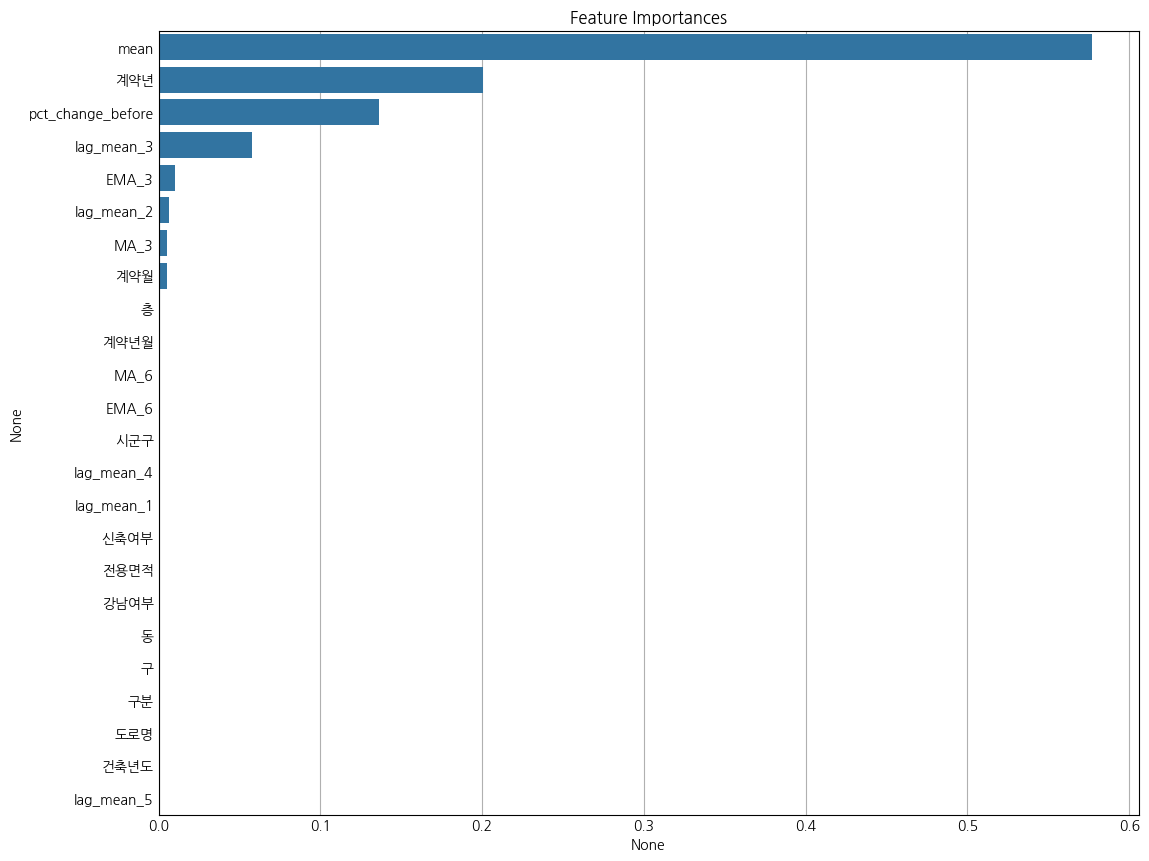

In [3154]:
# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [3155]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [3156]:
%%time
# Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.   2Î∂ÑÍ±∏Î¶º
perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
                             scoring = 'neg_mean_squared_error',        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

CPU times: user 463 ms, sys: 106 ms, total: 568 ms
Wall time: 1.2 s


- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [3157]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val['target'] = y_val
X_val['pred'] = pred

In [3158]:
# Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE Í≥ÑÏÇ∞
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [3159]:
# ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [3160]:
X_val_sort.head()

ÏãúÍµ∞Íµ¨     Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  ÎèÑÎ°úÎ™Ö  Íµ¨Î∂Ñ  Íµ¨  Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  \
8    0  114.676  202006  21  2007    0   0  0  0    5    4     0     0   
2    0  114.676  201504   4  2007    0   0  0  0    2    2     0     0   

       mean           MA_3      MA_6         EMA_3          EMA_6  \
8  158000.0  120566.666667  107450.0  130067.96875  115478.341403   
2   84500.0   90166.666667  107450.0   88750.00000  115478.341403   

   pct_change_before  lag_mean_1  lag_mean_2  lag_mean_3  lag_mean_4  \
8           0.173959    110000.0     93700.0     99000.0     90000.0   
2          -0.102041     88000.0     98000.0     98000.0     98000.0   

   lag_mean_5  target      pred        error  
8     94000.0  158000  127000.0  961000000.0  
2     98000.0   84500   90800.0   39690000.0

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [3161]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [3162]:
# Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [3163]:
display(error_top100.head(1))
display(best_top100.head(1))

ÏãúÍµ∞Íµ¨     Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ       ÎèÑÎ°úÎ™Ö  \
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä  114.676  202006  21  2007  ÌïúÍ∞ïÎåÄÎ°ú 211   

                                    Íµ¨Î∂Ñ    Íµ¨      Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  \
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676  Ïö©ÏÇ∞Íµ¨  ÌïúÍ∞ïÎ°ú1Í∞Ä  2020  06     0     0   

       mean           MA_3      MA_6         EMA_3          EMA_6  \
8  158000.0  120566.666667  107450.0  130067.96875  115478.341403   

   pct_change_before  lag_mean_1  lag_mean_2  lag_mean_3  lag_mean_4  \
8           0.173959    110000.0     93700.0     99000.0     90000.0   

   lag_mean_5  target      pred        error  
8     94000.0  158000  127000.0  961000000.0

ÏãúÍµ∞Íµ¨     Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ       ÎèÑÎ°úÎ™Ö  \
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä  114.676  202006  21  2007  ÌïúÍ∞ïÎåÄÎ°ú 211   

                                    Íµ¨Î∂Ñ    Íµ¨      Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  \
8  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÌïúÍ∞ïÎ°ú1Í∞Ä 64 ÎåÄÏö∞ÏõîÎìúÎßàÌÅ¨Ïö©ÏÇ∞ 114.676  Ïö©ÏÇ∞Íµ¨  ÌïúÍ∞ïÎ°ú1Í∞Ä  2020  06     0     0   

       mean           MA_3      MA_6         EMA_3          EMA_6  \
8  158000.0  120566.666667  107450.0  130067.96875  115478.341403   

   pct_change_before  lag_mean_1  lag_mean_2  lag_mean_3  lag_mean_4  \
8           0.173959    110000.0     93700.0     99000.0     90000.0   

   lag_mean_5  target      pred        error  
8     94000.0  158000  127000.0  961000000.0

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

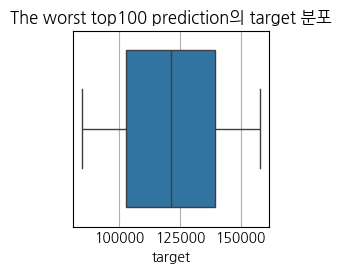

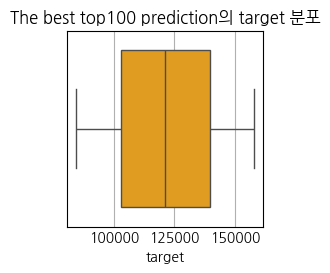

In [3164]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

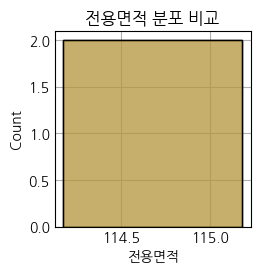

In [3165]:
sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6 . Inference (Ï∂îÎ°†)

In [3166]:
dt_test.head(2)      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

Empty DataFrame
Columns: [ÏãúÍµ∞Íµ¨, Ï†ÑÏö©Î©¥Ï†Å, Í≥ÑÏïΩÎÖÑÏõî, Ï∏µ, Í±¥Ï∂ïÎÖÑÎèÑ, ÎèÑÎ°úÎ™Ö, target, Íµ¨Î∂Ñ, Íµ¨, Îèô, Í≥ÑÏïΩÎÖÑ, Í≥ÑÏïΩÏõî, Í∞ïÎÇ®Ïó¨Î∂Ä, Ïã†Ï∂ïÏó¨Î∂Ä, mean, MA_3, MA_6, EMA_3, EMA_6, pct_change_before, lag_mean_1, lag_mean_2, lag_mean_3, lag_mean_4, lag_mean_5]
Index: []

In [3167]:
dt_test

Empty DataFrame
Columns: [ÏãúÍµ∞Íµ¨, Ï†ÑÏö©Î©¥Ï†Å, Í≥ÑÏïΩÎÖÑÏõî, Ï∏µ, Í±¥Ï∂ïÎÖÑÎèÑ, ÎèÑÎ°úÎ™Ö, target, Íµ¨Î∂Ñ, Íµ¨, Îèô, Í≥ÑÏïΩÎÖÑ, Í≥ÑÏïΩÏõî, Í∞ïÎÇ®Ïó¨Î∂Ä, Ïã†Ï∂ïÏó¨Î∂Ä, mean, MA_3, MA_6, EMA_3, EMA_6, pct_change_before, lag_mean_1, lag_mean_2, lag_mean_3, lag_mean_4, lag_mean_5]
Index: []

In [3168]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [3169]:
X_test = dt_test.drop(['target'], axis=1)

In [3170]:
X_test.isna().sum()

ÏãúÍµ∞Íµ¨                  0.0
Ï†ÑÏö©Î©¥Ï†Å                 0.0
Í≥ÑÏïΩÎÖÑÏõî                 0.0
Ï∏µ                    0.0
Í±¥Ï∂ïÎÖÑÎèÑ                 0.0
ÎèÑÎ°úÎ™Ö                  0.0
Íµ¨Î∂Ñ                   0.0
Íµ¨                    0.0
Îèô                    0.0
Í≥ÑÏïΩÎÖÑ                  0.0
Í≥ÑÏïΩÏõî                  0.0
Í∞ïÎÇ®Ïó¨Î∂Ä                 0.0
Ïã†Ï∂ïÏó¨Î∂Ä                 0.0
mean                 0.0
MA_3                 0.0
MA_6                 0.0
EMA_3                0.0
EMA_6                0.0
pct_change_before    0.0
lag_mean_1           0.0
lag_mean_2           0.0
lag_mean_3           0.0
lag_mean_4           0.0
lag_mean_5           0.0
dtype: float64

In [3171]:
%%time

# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
real_test_pred = model.predict(X_test)

ValueError: Found array with 0 sample(s) (shape=(0, 24)) while a minimum of 1 is required by RandomForestRegressor.

In [3172]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([27780.])

## 7 . Output File Save

In [3173]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)

In [3174]:
preds_df.to_csv('/content/drive/MyDrive/AILAB_Advance/output.csv', index=False)


# Í∏∞ÌÉÄ : ÌïúÍ∏Ä Îã§Ïãú ÏÑ§Ïπò

In [3175]:
### ÌïúÍ∏Ä Îã§Ïãú ÏÑ§Ïπò
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# Ï∂úÏ≤ò: https://giveme-happyending.tistory.com/192 [ÏÜåÏó∞Ïùò_Í∞úÎ∞úÏùºÏßÄ:Ìã∞Ïä§ÌÜ†Î¶¨]

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director